In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr

## Loading the datasets

In [44]:
df_sales = pd.read_csv("Online_Sales.csv")
df_marketing = pd.read_csv("Marketing_Spend.csv")
df_customers = pd.read_excel("CustomersData.xlsx")
df_coupons = pd.read_csv("Discount_Coupon.csv")
df_tax = pd.read_excel("Tax_amount.xlsx")

## Data Analysis
Analyse the datasets, the columns in those datasets, missing values.
Analyse data distribution for each frame

In [45]:
# Examine Data Types and Summary Statistics
for df_name, df in zip(['df_customers', 'df_coupons', 'df_marketing', 'df_sales', 'df_tax'],
                       [df_customers, df_coupons, df_marketing, df_sales, df_tax]):
    print(f"Data Types in {df_name} and Summary Statistics for {df_name}:")
    display(df.dtypes)
    display(df.describe(include='all'))
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"For {col} in {df_name}, the unique values and their frequencies are as follows: ")
            display(df[col].value_counts())
    print(f"For the dataframe {df_name}, the number of missing values are: ")
    display(df.isnull().sum())

Data Types in df_customers and Summary Statistics for df_customers:


,0
CustomerID,int64
Gender,object
Location,object
Tenure_Months,int64


,CustomerID,Gender,Location,Tenure_Months
count,1468.000000,1468,1468,1468.000000
unique,NaN,2,5,NaN
top,NaN,F,California,NaN
freq,NaN,934,464,NaN
mean,15314.386240,NaN,NaN,25.912125
std,1744.000367,NaN,NaN,13.959667
min,12346.000000,NaN,NaN,2.000000
25%,13830.500000,NaN,NaN,14.000000
50%,15300.000000,NaN,NaN,26.000000
75%,16882.250000,NaN,NaN,38.000000


For Gender in df_customers, the unique values and their frequencies are as follows: 


,count
Gender,
F,934
M,534


For Location in df_customers, the unique values and their frequencies are as follows: 


,count
Location,
California,464
Chicago,456
New York,324
New Jersey,149
Washington DC,75


For the dataframe df_customers, the number of missing values are: 


,0
CustomerID,0
Gender,0
Location,0
Tenure_Months,0


Data Types in df_coupons and Summary Statistics for df_coupons:


,0
Month,object
Product_Category,object
Coupon_Code,object
Discount_pct,int64


,Month,Product_Category,Coupon_Code,Discount_pct
count,204,204,204,204.000000
unique,12,17,48,NaN
top,Jan,Apparel,EXTRA20,NaN
freq,17,12,8,NaN
mean,NaN,NaN,NaN,20.000000
std,NaN,NaN,NaN,8.185052
min,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,10.000000
50%,NaN,NaN,NaN,20.000000
75%,NaN,NaN,NaN,30.000000


For Month in df_coupons, the unique values and their frequencies are as follows: 


,count
Month,
Jan,17
Feb,17
Mar,17
Apr,17
May,17
Jun,17
Jul,17
Aug,17
Sep,17


For Product_Category in df_coupons, the unique values and their frequencies are as follows: 


,count
Product_Category,
Apparel,12
Nest-USA,12
Office,12
Drinkware,12
Lifestyle,12
Bags,12
Notebooks,12
Headgear,12
Nest,12


For Coupon_Code in df_coupons, the unique values and their frequencies are as follows: 


,count
Coupon_Code,
EXTRA20,8
EXTRA30,8
EXTRA10,8
SALE10,4
ELEC20,4
SALE20,4
SALE30,4
ELEC10,4
OFF20,4


For the dataframe df_coupons, the number of missing values are: 


,0
Month,0
Product_Category,0
Coupon_Code,0
Discount_pct,0


Data Types in df_marketing and Summary Statistics for df_marketing:


,0
Date,object
Offline_Spend,int64
Online_Spend,float64


,Date,Offline_Spend,Online_Spend
count,365,365.000000,365.000000
unique,365,NaN,NaN
top,12/31/2019,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2843.561644,1905.880740
std,NaN,952.292448,808.856853
min,NaN,500.000000,320.250000
25%,NaN,2500.000000,1258.600000
50%,NaN,3000.000000,1881.940000
75%,NaN,3500.000000,2435.120000


For Date in df_marketing, the unique values and their frequencies are as follows: 


,count
Date,
12/31/2019,1
1/1/2019,1
1/2/2019,1
1/3/2019,1
1/4/2019,1
...,...
1/18/2019,1
1/17/2019,1
1/16/2019,1


For the dataframe df_marketing, the number of missing values are: 


,0
Date,0
Offline_Spend,0
Online_Spend,0


Data Types in df_sales and Summary Statistics for df_sales:


,0
CustomerID,int64
Transaction_ID,int64
Transaction_Date,object
Product_SKU,object
Product_Description,object
Product_Category,object
Quantity,int64
Avg_Price,float64
Delivery_Charges,float64
Coupon_Status,object


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
count,52924.00000,52924.000000,52924,52924,52924,52924,52924.000000,52924.000000,52924.000000,52924
unique,NaN,NaN,365,1145,404,20,NaN,NaN,NaN,3
top,NaN,NaN,11/27/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,NaN,NaN,NaN,Clicked
freq,NaN,NaN,335,3511,3511,18126,NaN,NaN,NaN,26926
mean,15346.70981,32409.825675,NaN,NaN,NaN,NaN,4.497638,52.237646,10.517630,NaN
std,1766.55602,8648.668977,NaN,NaN,NaN,NaN,20.104711,64.006882,19.475613,NaN
min,12346.00000,16679.000000,NaN,NaN,NaN,NaN,1.000000,0.390000,0.000000,NaN
25%,13869.00000,25384.000000,NaN,NaN,NaN,NaN,1.000000,5.700000,6.000000,NaN
50%,15311.00000,32625.500000,NaN,NaN,NaN,NaN,1.000000,16.990000,6.000000,NaN
75%,16996.25000,39126.250000,NaN,NaN,NaN,NaN,2.000000,102.130000,6.500000,NaN


For Transaction_Date in df_sales, the unique values and their frequencies are as follows: 


,count
Transaction_Date,
11/27/2019,335
7/13/2019,311
8/16/2019,298
8/2/2019,292
7/31/2019,291
...,...
2/5/2019,41
1/28/2019,39
12/24/2019,35


For Product_SKU in df_sales, the unique values and their frequencies are as follows: 


,count
Product_SKU,
GGOENEBJ079499,3511
GGOENEBQ078999,3328
GGOENEBB078899,3230
GGOENEBQ079099,1361
GGOENEBQ084699,1089
...,...
GGOEGAEB091118,1
GGOEGAEB091112,1
GGOEAAEB091718,1


For Product_Description in df_sales, the unique values and their frequencies are as follows: 


,count
Product_Description,
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,3511
Nest Cam Outdoor Security Camera - USA,3328
Nest Cam Indoor Security Camera - USA,3230
Google Sunglasses,1523
Nest Protect Smoke + CO White Battery Alarm-USA,1361
...,...
Google Tee Red,2
Google Women's Colorblock Tee White,1
Android Women's Short Sleeve Tri-blend Badge Tee Light Blue,1


For Product_Category in df_sales, the unique values and their frequencies are as follows: 


,count
Product_Category,
Apparel,18126
Nest-USA,14013
Office,6513
Drinkware,3483
Lifestyle,3092
Nest,2198
Bags,1882
Headgear,771
Notebooks & Journals,749


For Coupon_Status in df_sales, the unique values and their frequencies are as follows: 


,count
Coupon_Status,
Clicked,26926
Used,17904
Not Used,8094


For the dataframe df_sales, the number of missing values are: 


,0
CustomerID,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0
Coupon_Status,0


Data Types in df_tax and Summary Statistics for df_tax:


,0
Product_Category,object
GST,float64


,Product_Category,GST
count,20,20.000000
unique,20,NaN
top,Nest-USA,NaN
freq,1,NaN
mean,NaN,0.116500
std,NaN,0.052443
min,NaN,0.050000
25%,NaN,0.087500
50%,NaN,0.100000
75%,NaN,0.180000


For Product_Category in df_tax, the unique values and their frequencies are as follows: 


,count
Product_Category,
Nest-USA,1
Office,1
Apparel,1
Bags,1
Drinkware,1
Lifestyle,1
Notebooks & Journals,1
Headgear,1
Waze,1


For the dataframe df_tax, the number of missing values are: 


,0
Product_Category,0
GST,0


## Data Conversion and standardisation
Convert dataframe column names to a single standard(ex lowercase) and change the column data type wherever required t make the analysis easier

In [46]:
df_marketing['Date'] = pd.to_datetime(df_marketing['Date'])
df_sales['Transaction_Date'] = pd.to_datetime(df_sales['Transaction_Date'], errors='coerce')

for col in ['Gender', 'Location']:
    if col in df_customers.columns:
        df_customers[col] = df_customers[col].astype(str).str.lower()

for col in ['Product_Category', 'Month', 'Coupon_Code']:
    if col in df_coupons.columns:
        df_coupons[col] = df_coupons[col].astype(str).str.lower()

for col in ['Product_SKU', 'Product_Description', 'Product_Category', 'Coupon_Status']:
    if col in df_sales.columns:
        df_sales[col] = df_sales[col].astype(str).str.lower()

for col in ['Product_Category']:
    if col in df_tax.columns:
        df_tax[col] = df_tax[col].astype(str).str.lower()

df_customers.columns = df_customers.columns.str.lower()
df_coupons.columns = df_coupons.columns.str.lower()
df_marketing.columns = df_marketing.columns.str.lower()
df_sales.columns = df_sales.columns.str.lower()
df_tax.columns = df_tax.columns.str.lower()

## Merging the datasets

In [47]:
df_sales['month'] = df_sales['transaction_date'].dt.month
df_coupons['month'] = df_coupons['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df_merged = pd.merge(df_sales, df_coupons, on=['product_category', 'month'], how='left')

df_merged = pd.merge(df_merged, df_customers, on='customerid', how='left')

df_merged['transaction_month'] = df_merged['transaction_date'].dt.to_period('M')
df_marketing['date'] = pd.to_datetime(df_marketing['date'])
df_marketing['transaction_month'] = df_marketing['date'].dt.to_period('M')
df_monthly_spend = df_marketing.groupby('transaction_month').agg({
    'online_spend': 'sum',
    'offline_spend': 'sum'
}).reset_index()
df_monthly_spend['total_spend'] = df_monthly_spend['online_spend'] + df_monthly_spend['offline_spend']
df_merged = pd.merge(df_merged, df_monthly_spend, on='transaction_month', how='left')

df_merged = pd.merge(df_merged, df_tax, on='product_category', how='left')

print(df_merged.shape)
display(df_merged.head())
print("The data types for the merged dataframe are:")
display(df_merged.dtypes)

(52924, 21)


,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,...,coupon_code,discount_pct,gender,location,tenure_months,transaction_month,online_spend,offline_spend,total_spend,gst
0,17850,16679,2019-01-01,ggoenebj079499,nest learning thermostat 3rd gen-usa - stainle...,nest-usa,1,153.71,6.5,used,...,elec10,10.0,m,chicago,12,2019-01,58328.95,96600,154928.95,0.10
1,17850,16680,2019-01-01,ggoenebj079499,nest learning thermostat 3rd gen-usa - stainle...,nest-usa,1,153.71,6.5,used,...,elec10,10.0,m,chicago,12,2019-01,58328.95,96600,154928.95,0.10
2,17850,16681,2019-01-01,ggoegfkq020399,google laptop and cell phone stickers,office,1,2.05,6.5,used,...,off10,10.0,m,chicago,12,2019-01,58328.95,96600,154928.95,0.10
3,17850,16682,2019-01-01,ggoegaab010516,google men's 100% cotton short sleeve hero tee...,apparel,5,17.53,6.5,not used,...,sale10,10.0,m,chicago,12,2019-01,58328.95,96600,154928.95,0.18
4,17850,16682,2019-01-01,ggoegbjl013999,google canvas tote natural/navy,bags,1,16.50,6.5,used,...,aio10,10.0,m,chicago,12,2019-01,58328.95,96600,154928.95,0.18


The data types for the merged dataframe are:


,0
customerid,int64
transaction_id,int64
transaction_date,datetime64[ns]
product_sku,object
product_description,object
product_category,object
quantity,int64
avg_price,float64
delivery_charges,float64
coupon_status,object


## Feature Engineering

In [48]:
df_sales['total_revenue'] = df_sales['quantity'] * df_sales['avg_price'] + df_sales['delivery_charges']

# Customer Lifetime Value (CLTV)
df_cltv = df_sales.groupby('customerid')['total_revenue'].sum().reset_index()
df_cltv.columns = ['customerid', 'cltv']

# RFM Features
# Recency
df_recency = df_sales.groupby('customerid')['transaction_date'].max().reset_index()
df_recency.columns = ['customerid', 'last_transaction_date']
df_recency['recency'] = (pd.to_datetime('2019-12-31') - df_recency['last_transaction_date']).dt.days
display(df_recency)
display(df_sales)

# Frequency
df_frequency = df_sales.groupby('customerid')['transaction_id'].count().reset_index()
df_frequency.columns = ['customerid', 'frequency']
display(df_frequency)

# Monetary Value
df_monetary = df_sales.groupby('customerid')['total_revenue'].sum().reset_index()
df_monetary.columns = ['customerid', 'monetary_value']
display(df_monetary)

# Create df_rfm
df_rfm = pd.merge(df_recency, df_frequency, on='customerid')
df_rfm = pd.merge(df_rfm, df_monetary, on='customerid')

# Merge RFM and CLTV
df_rfm = pd.merge(df_rfm, df_cltv, on='customerid')
display(df_rfm)

df_merged = pd.merge(df_merged, df_rfm, on='customerid')
display(df_merged)

,customerid,last_transaction_date,recency
0,12346,2019-09-15,107
1,12347,2019-11-02,59
2,12348,2019-10-19,73
3,12350,2019-12-14,17
4,12356,2019-09-15,107
...,...,...,...
1463,18259,2019-04-05,270
1464,18260,2019-10-05,87
1465,18269,2019-06-20,194
1466,18277,2019-10-23,69


,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,month,total_revenue
0,17850,16679,2019-01-01,ggoenebj079499,nest learning thermostat 3rd gen-usa - stainle...,nest-usa,1,153.71,6.50,used,1,160.21
1,17850,16680,2019-01-01,ggoenebj079499,nest learning thermostat 3rd gen-usa - stainle...,nest-usa,1,153.71,6.50,used,1,160.21
2,17850,16681,2019-01-01,ggoegfkq020399,google laptop and cell phone stickers,office,1,2.05,6.50,used,1,8.55
3,17850,16682,2019-01-01,ggoegaab010516,google men's 100% cotton short sleeve hero tee...,apparel,5,17.53,6.50,not used,1,94.15
4,17850,16682,2019-01-01,ggoegbjl013999,google canvas tote natural/navy,bags,1,16.50,6.50,used,1,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,ggoenebb078899,nest cam indoor security camera - usa,nest-usa,1,121.30,6.50,clicked,12,127.80
52920,14410,48494,2019-12-31,ggoegaeb091117,google zip hoodie black,apparel,1,48.92,6.50,used,12,55.42
52921,14410,48495,2019-12-31,ggoenebq084699,nest learning thermostat 3rd gen-usa - white,nest-usa,1,151.88,6.50,used,12,158.38
52922,14600,48496,2019-12-31,ggoenebq079199,nest protect smoke + co white wired alarm-usa,nest-usa,5,80.52,6.50,clicked,12,409.10


,customerid,frequency
0,12346,2
1,12347,60
2,12348,23
3,12350,17
4,12356,36
...,...,...
1463,18259,7
1464,18260,40
1465,18269,8
1466,18277,1


,customerid,monetary_value
0,12346,180.99
1,12347,14500.04
2,12348,1639.27
3,12350,1487.95
4,12356,2079.96
...,...,...
1463,18259,822.67
1464,18260,2995.47
1465,18269,153.06
1466,18277,304.00


,customerid,last_transaction_date,recency,frequency,monetary_value,cltv
0,12346,2019-09-15,107,2,180.99,180.99
1,12347,2019-11-02,59,60,14500.04,14500.04
2,12348,2019-10-19,73,23,1639.27,1639.27
3,12350,2019-12-14,17,17,1487.95,1487.95
4,12356,2019-09-15,107,36,2079.96,2079.96
...,...,...,...,...,...,...
1463,18259,2019-04-05,270,7,822.67,822.67
1464,18260,2019-10-05,87,40,2995.47,2995.47
1465,18269,2019-06-20,194,8,153.06,153.06
1466,18277,2019-10-23,69,1,304.00,304.00


,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,...,transaction_month,online_spend,offline_spend,total_spend,gst,last_transaction_date,recency,frequency,monetary_value,cltv
0,17850,16679,2019-01-01,ggoenebj079499,nest learning thermostat 3rd gen-usa - stainle...,nest-usa,1,153.71,6.50,used,...,2019-01,58328.95,96600,154928.95,0.10,2019-01-26,339,297,37714.02,37714.02
1,17850,16680,2019-01-01,ggoenebj079499,nest learning thermostat 3rd gen-usa - stainle...,nest-usa,1,153.71,6.50,used,...,2019-01,58328.95,96600,154928.95,0.10,2019-01-26,339,297,37714.02,37714.02
2,17850,16681,2019-01-01,ggoegfkq020399,google laptop and cell phone stickers,office,1,2.05,6.50,used,...,2019-01,58328.95,96600,154928.95,0.10,2019-01-26,339,297,37714.02,37714.02
3,17850,16682,2019-01-01,ggoegaab010516,google men's 100% cotton short sleeve hero tee...,apparel,5,17.53,6.50,not used,...,2019-01,58328.95,96600,154928.95,0.18,2019-01-26,339,297,37714.02,37714.02
4,17850,16682,2019-01-01,ggoegbjl013999,google canvas tote natural/navy,bags,1,16.50,6.50,used,...,2019-01,58328.95,96600,154928.95,0.18,2019-01-26,339,297,37714.02,37714.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,ggoenebb078899,nest cam indoor security camera - usa,nest-usa,1,121.30,6.50,clicked,...,2019-12,76648.75,122000,198648.75,0.10,2019-12-31,0,8,1160.99,1160.99
52920,14410,48494,2019-12-31,ggoegaeb091117,google zip hoodie black,apparel,1,48.92,6.50,used,...,2019-12,76648.75,122000,198648.75,0.18,2019-12-31,0,8,1160.99,1160.99
52921,14410,48495,2019-12-31,ggoenebq084699,nest learning thermostat 3rd gen-usa - white,nest-usa,1,151.88,6.50,used,...,2019-12,76648.75,122000,198648.75,0.10,2019-12-31,0,8,1160.99,1160.99
52922,14600,48496,2019-12-31,ggoenebq079199,nest protect smoke + co white wired alarm-usa,nest-usa,5,80.52,6.50,clicked,...,2019-12,76648.75,122000,198648.75,0.10,2019-12-31,0,2,751.17,751.17


## Q1
Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?

In [49]:
df_sales["transaction_month"] = df_sales["transaction_date"].dt.month
customerCount = df_sales["customerid"].nunique()

groupedSalesData = df_sales.groupby('customerid')['transaction_month'].min()
acquiredCustomers = groupedSalesData.value_counts().reset_index()
acquiredCustomers['transaction_month'] = acquiredCustomers['transaction_month'].apply(lambda x: calendar.month_name[x])
acquiredCustomers['monthly_acquisition_percentage'] = round((acquiredCustomers['count']/customerCount)*100, 2) ## should this be divided by the total customer count or the customers in that month? that month will answer what percent of users in a month were new users
display(acquiredCustomers)

,transaction_month,count,monthly_acquisition_percentage
0,January,215,14.65
1,March,177,12.06
2,April,163,11.10
3,June,137,9.33
4,August,135,9.20
5,May,112,7.63
6,December,106,7.22
7,February,96,6.54
8,July,94,6.40
9,October,87,5.93


In [50]:
highest_acq_month = acquiredCustomers.loc[acquiredCustomers['monthly_acquisition_percentage'].idxmax(), 'transaction_month']
lowest_acq_month = acquiredCustomers.loc[acquiredCustomers['monthly_acquisition_percentage'].idxmin(), 'transaction_month']

print(f"Month with the highest acquisition rate: {highest_acq_month}")
print(f"Month with the lowest acquisition rate: {lowest_acq_month}")

Month with the highest acquisition rate: January
Month with the lowest acquisition rate: November


Finding the monthly marketing spend and discount percentage to plot that along with the acquisition rates and compare the three values

In [51]:
df_marketing['date'] = pd.to_datetime(df_marketing['date'])
df_marketing['transaction_month'] = df_marketing['date'].dt.month
df_marketing['total_spend'] = df_marketing['offline_spend'] + df_marketing['online_spend']
monthWiseSpending = df_marketing.groupby('transaction_month')['total_spend'].sum().reset_index()
monthWiseSpending['transaction_month'] = monthWiseSpending['transaction_month'].apply(lambda x: calendar.month_name[x])

map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'Septeber', 10: 'October', 11: 'November', 12: 'December'}
monthlyDiscountData = df_coupons.groupby('month')['discount_pct'].mean().reset_index()
display(monthlyDiscountData)
monthlyDiscountData['transaction_month'] = monthlyDiscountData['month'].apply(lambda x: map[x])
monthlyDiscountData

spending_acquisition_df = pd.merge(acquiredCustomers, monthWiseSpending, on='transaction_month', how='left')
spending_acquisition_df = pd.merge(spending_acquisition_df, monthlyDiscountData, on='transaction_month', how='left')
spending_acquisition_df_normalised = spending_acquisition_df.copy()

scaler = MinMaxScaler()
colsToNormalize = ['count', 'total_spend', 'discount_pct']
spending_acquisition_df_normalised[colsToNormalize] = scaler.fit_transform(spending_acquisition_df_normalised[colsToNormalize])

monthMapping = {month: index for index, month in enumerate(calendar.month_name) if month}
spending_acquisition_df_normalised['transaction_month_num'] = spending_acquisition_df_normalised['transaction_month'].map(monthMapping)
spending_acquisition_df_normalised = spending_acquisition_df_normalised.sort_values(by=['transaction_month_num'])
spending_acquisition_df['transaction_month_num'] = spending_acquisition_df_normalised['transaction_month'].map(monthMapping)
spending_acquisition_df = spending_acquisition_df_normalised.sort_values(by=['transaction_month_num'])
spending_acquisition_df_normalised

,month,discount_pct
0,1,10.0
1,2,20.0
2,3,30.0
3,4,10.0
4,5,20.0
5,6,30.0
6,7,10.0
7,8,20.0
8,9,30.0
9,10,10.0


,transaction_month,count,monthly_acquisition_percentage,total_spend,month,discount_pct,transaction_month_num
0,January,1.000000,14.65,0.456148,1.0,0.0,1
7,February,0.190476,6.54,0.234463,2.0,0.5,2
1,March,0.741497,12.06,0.049639,3.0,1.0,3
2,April,0.646259,11.10,0.482244,4.0,0.0,4
5,May,0.299320,7.63,0.000000,5.0,0.5,5
3,June,0.469388,9.33,0.199760,6.0,1.0,6
8,July,0.176871,6.40,0.024359,7.0,0.0,7
4,August,0.455782,9.20,0.306565,8.0,0.5,8
10,September,0.068027,5.31,0.214642,NaN,NaN,9
9,October,0.129252,5.93,0.410068,10.0,0.0,10


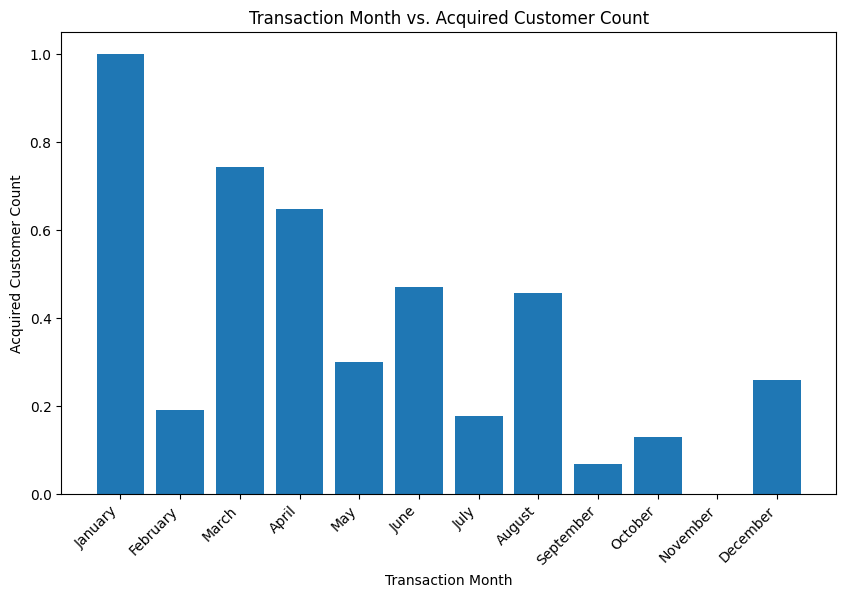

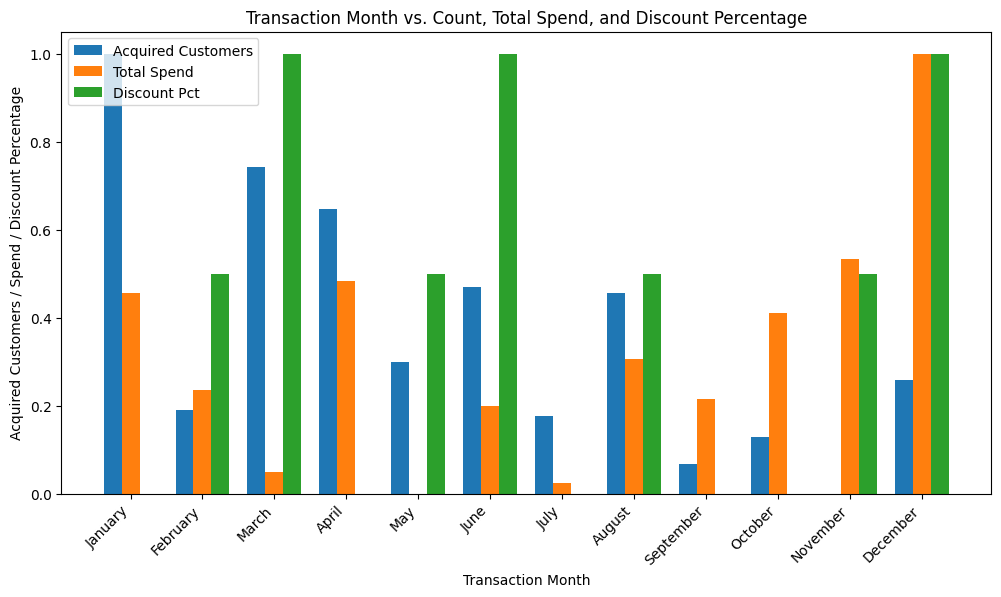

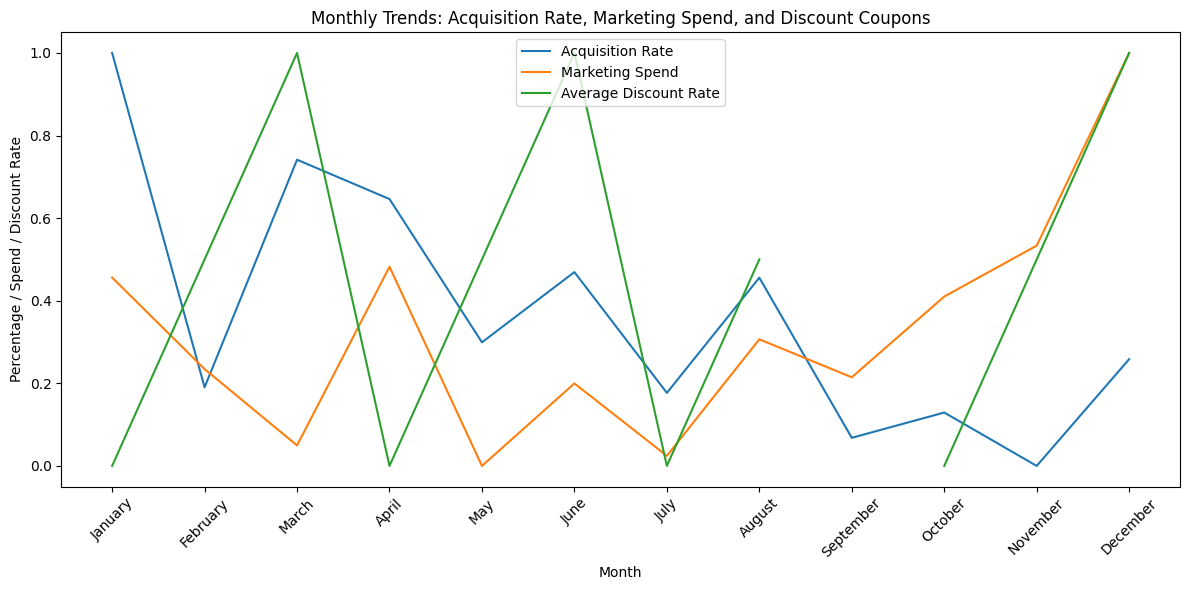

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(spending_acquisition_df_normalised['transaction_month'], spending_acquisition_df_normalised['count'])

plt.xlabel('Transaction Month')
plt.ylabel('Acquired Customer Count')
plt.title('Transaction Month vs. Acquired Customer Count')
plt.xticks(rotation=45, ha='right')

bar_width = 0.25
x_pos = np.arange(len(spending_acquisition_df_normalised['transaction_month']))

plt.figure(figsize=(12, 6))
plt.bar(x_pos, spending_acquisition_df_normalised['count'], width=bar_width, label='Acquired Customers')
plt.bar(x_pos + bar_width, spending_acquisition_df_normalised['total_spend'], width=bar_width, label='Total Spend')
plt.bar(x_pos + 2 * bar_width, spending_acquisition_df_normalised['discount_pct'], width=bar_width, label='Discount Pct')

plt.xticks(x_pos + bar_width, spending_acquisition_df_normalised['transaction_month'])

plt.xlabel('Transaction Month')
plt.ylabel('Acquired Customers / Spend / Discount Percentage')
plt.title('Transaction Month vs. Count, Total Spend, and Discount Percentage')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.figure(figsize=(12, 6))
plt.plot(spending_acquisition_df_normalised['transaction_month'], spending_acquisition_df_normalised['count'], label='Acquisition Rate')
plt.plot(spending_acquisition_df_normalised['transaction_month'], spending_acquisition_df_normalised['total_spend'], label='Marketing Spend')
plt.plot(spending_acquisition_df_normalised['transaction_month'], spending_acquisition_df_normalised['discount_pct'], label='Average Discount Rate')

plt.xlabel('Month')
plt.ylabel('Percentage / Spend / Discount Rate')
plt.title('Monthly Trends: Acquisition Rate, Marketing Spend, and Discount Coupons')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Q3
Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?

## Assumptions:
Retention Rate is calculated monthly.
RententionRate for february = Number of users that shopped in january and then shopped in february too

In [53]:
monthly_unique_customers = df_sales.groupby('transaction_month')['customerid'].unique()
retentionRates = [0]
for month in range(2, 13):
  previousMonth = month - 1
  currentMonthCustomers = set(monthly_unique_customers[month])
  previousMonthCustomers = set(monthly_unique_customers[previousMonth])
  retentionCount = len(currentMonthCustomers.intersection(previousMonthCustomers))
  rententionRate = round((retentionCount/len(previousMonthCustomers)*100), 2)
  retentionRates.append(rententionRate)

spending_acquisition_df['retention_rate'] = retentionRates
spending_acquisition_df

,transaction_month,count,monthly_acquisition_percentage,total_spend,month,discount_pct,transaction_month_num,retention_rate
0,January,1.000000,14.65,0.456148,1.0,0.0,1,0.00
7,February,0.190476,6.54,0.234463,2.0,0.5,2,6.05
1,March,0.741497,12.06,0.049639,3.0,1.0,3,10.09
2,April,0.646259,11.10,0.482244,4.0,0.0,4,11.54
5,May,0.299320,7.63,0.000000,5.0,0.5,5,11.16
3,June,0.469388,9.33,0.199760,6.0,1.0,6,18.50
8,July,0.176871,6.40,0.024359,7.0,0.0,7,22.39
4,August,0.455782,9.20,0.306565,8.0,0.5,8,27.54
10,September,0.068027,5.31,0.214642,NaN,NaN,9,14.67
9,October,0.129252,5.93,0.410068,10.0,0.0,10,15.03


In [54]:
retention_data = spending_acquisition_df[spending_acquisition_df['transaction_month'] != 'January']
maxRetentionMonth = retention_data.loc[retention_data['retention_rate'].idxmax(), 'transaction_month']
minRetentionMonth = retention_data.loc[retention_data['retention_rate'].idxmin(), 'transaction_month']
print(f'Max retention rate month is {maxRetentionMonth}')
print(f'Min retention rate month is {minRetentionMonth}')

Max retention rate month is August
Min retention rate month is February


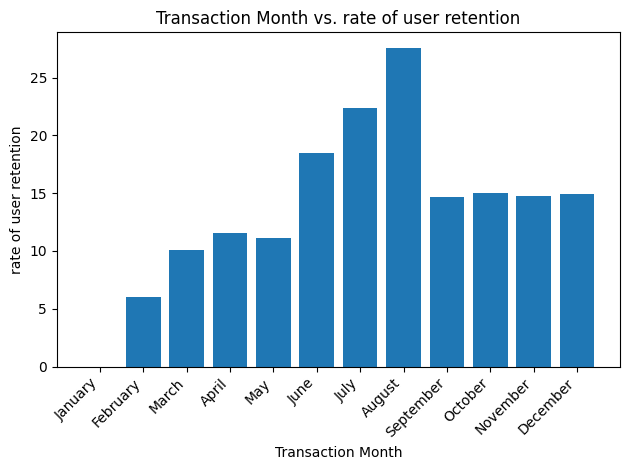

In [55]:
# plot monthwise retention rate on a bar graph
plt.bar(spending_acquisition_df['transaction_month'], spending_acquisition_df['retention_rate'])

plt.xlabel('Transaction Month')
plt.ylabel('rate of user retention')
plt.title('Transaction Month vs. rate of user retention')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Finding the monthly marketing spend and discount percentage to plot that along with the retention rates and compare the three values

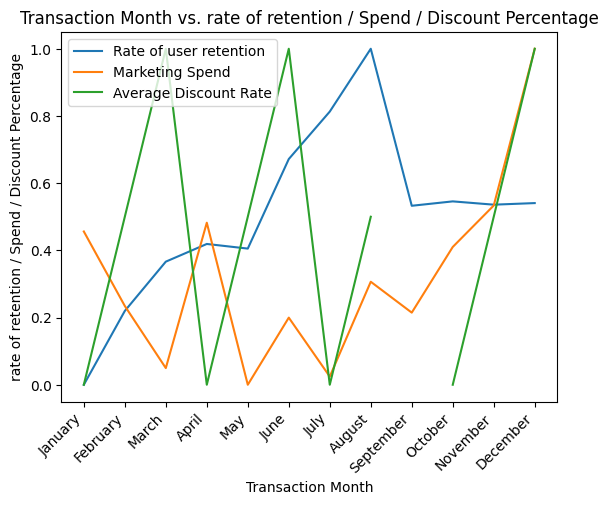

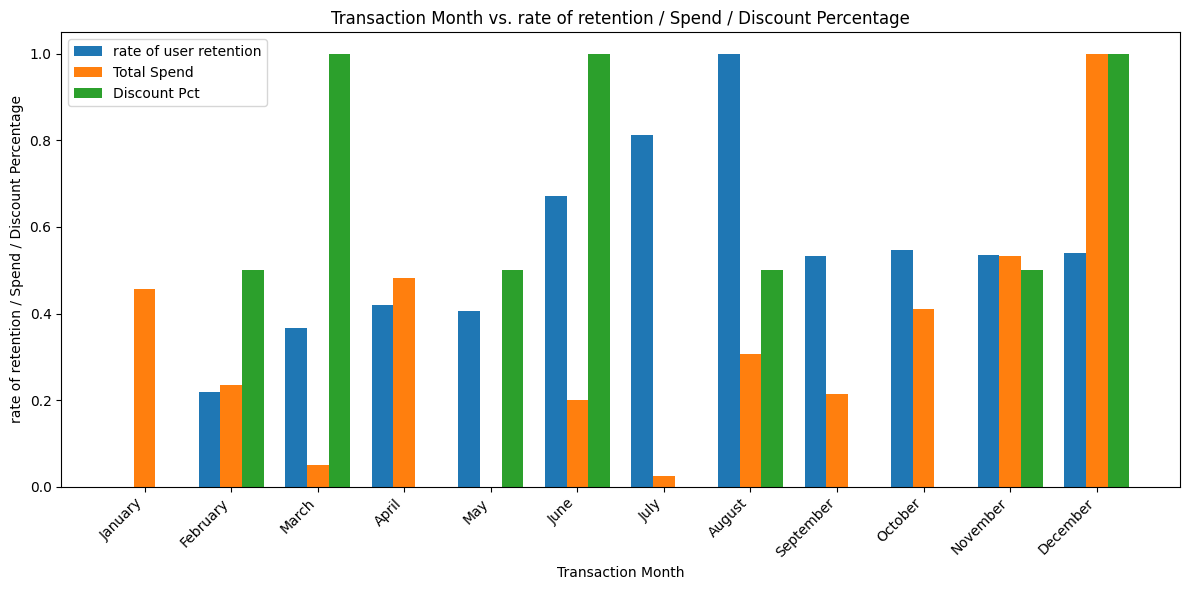

In [56]:
normalised_retention_data = spending_acquisition_df.copy()
scaler = MinMaxScaler()
colsToNormalize = ['retention_rate', 'total_spend', 'discount_pct']
normalised_retention_data[colsToNormalize] = scaler.fit_transform(normalised_retention_data[colsToNormalize])

plt.plot(normalised_retention_data['transaction_month'], normalised_retention_data['retention_rate'], label = 'Rate of user retention')
plt.plot(normalised_retention_data['transaction_month'], normalised_retention_data['total_spend'], label='Marketing Spend')
plt.plot(normalised_retention_data['transaction_month'], normalised_retention_data['discount_pct'], label='Average Discount Rate')

plt.xlabel('Transaction Month')
plt.ylabel('rate of retention / Spend / Discount Percentage')
plt.title('Transaction Month vs. rate of retention / Spend / Discount Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()

bar_width = 0.25
x_pos = np.arange(len(normalised_retention_data['transaction_month']))

plt.figure(figsize=(12, 6))
plt.bar(x_pos, normalised_retention_data['retention_rate'], width=bar_width, label='rate of user retention')
plt.bar(x_pos + bar_width, normalised_retention_data['total_spend'], width=bar_width, label='Total Spend')
plt.bar(x_pos + 2 * bar_width, normalised_retention_data['discount_pct'], width=bar_width, label='Discount Pct')

plt.xticks(x_pos + bar_width, normalised_retention_data['transaction_month'])

plt.xlabel('Transaction Month')
plt.ylabel('rate of retention / Spend / Discount Percentage')
plt.title('Transaction Month vs. rate of retention / Spend / Discount Percentage')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Q5
Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?

In [57]:
df_sales['transaction_date'] = pd.to_datetime(df_sales['transaction_date'])
df_sales['transaction_month'] = df_sales['transaction_date'].dt.month

df_sales['total_revenue'] = df_sales['quantity'] * df_sales['avg_price'] + df_sales['delivery_charges']

first_transaction_month = df_sales.groupby('customerid')['transaction_month'].min().reset_index()
first_transaction_month.rename(columns={'transaction_month': 'first_transaction_month'}, inplace=True)

df_sales = pd.merge(df_sales, first_transaction_month, on='customerid', how='left')

df_sales['customer_type'] = df_sales.apply(lambda row: 'New' if row['transaction_month'] == row['first_transaction_month'] else 'Existing', axis=1)

revenue_by_customer_type = df_sales.groupby(['transaction_month', 'customer_type'])['total_revenue'].sum().reset_index()

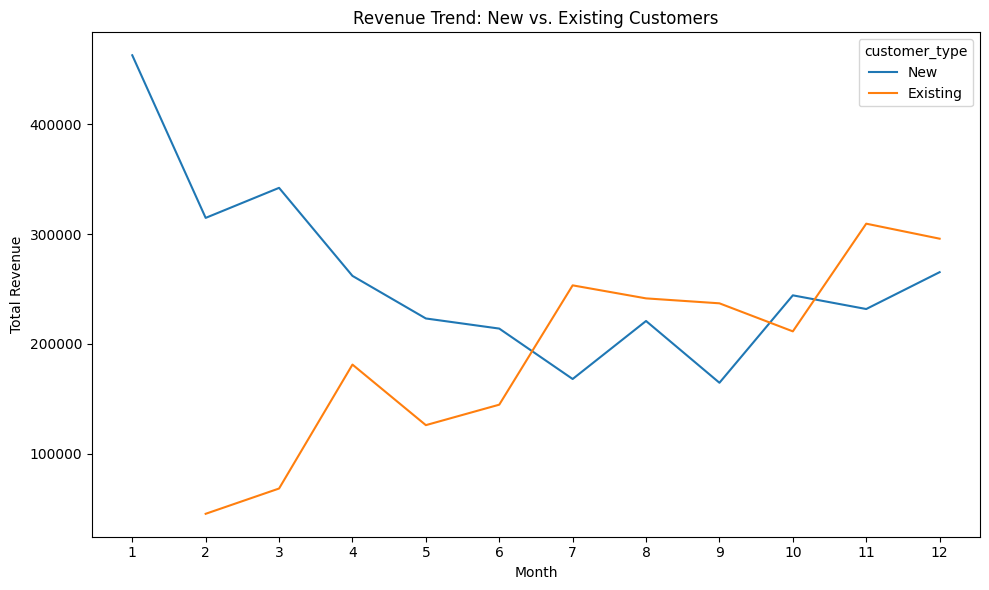

In [58]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='transaction_month', y='total_revenue', hue='customer_type', data=revenue_by_customer_type)
plt.title('Revenue Trend: New vs. Existing Customers')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

## Q6
Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?

In [59]:
# Now we will be using the df_merged which is the merged database that was created above for the analysis going forward

df_merged['total_revenue'] = df_merged['quantity'] * df_merged['avg_price'] + df_merged['delivery_charges']
average_revenue_per_coupon = df_merged[df_merged['coupon_status'] == 'used'].groupby('coupon_code')['total_revenue'].mean()

revenue_by_coupon_type = df_merged[df_merged['coupon_status'] == 'used'].groupby(['coupon_code', 'discount_pct'])['total_revenue'].sum()

# correlations between coupon usage and other variables
correlation_columns = ['total_revenue', 'discount_pct', 'tenure_months', 'quantity', 'frequency', 'monetary_value', 'cltv']
coupon_used_data = df_merged[df_merged['coupon_status'] == 'used'][correlation_columns]
correlations = coupon_used_data.corr()

display(correlations)

,total_revenue,discount_pct,tenure_months,quantity,frequency,monetary_value,cltv
total_revenue,1.000000,0.002127,0.010047,0.507189,0.010745,0.038037,0.038037
discount_pct,0.002127,1.000000,0.034571,-0.007454,-0.022490,-0.014527,-0.014527
tenure_months,0.010047,0.034571,1.000000,0.019481,0.064000,0.076761,0.076761
quantity,0.507189,-0.007454,0.019481,1.000000,0.006433,0.020557,0.020557
frequency,0.010745,-0.022490,0.064000,0.006433,1.000000,0.975708,0.975708
monetary_value,0.038037,-0.014527,0.076761,0.020557,0.975708,1.000000,1.000000
cltv,0.038037,-0.014527,0.076761,0.020557,0.975708,1.000000,1.000000


In [60]:
df_coupons_revenue_data = df_merged.copy()
df_coupons_revenue_data['coupon_status'] = df_coupons_revenue_data['coupon_status'].map({'used': 1, 'clicked': 0, 'not used': 0})
r_pb, p_pb = pointbiserialr(df_coupons_revenue_data["coupon_status"], df_coupons_revenue_data["total_revenue"])
print("Point‐biserial r: ", r_pb)
print("p-value is: ", p_pb)

Point‐biserial r:  -0.0048272135256718345
p-value is:  0.2667874279989839


In [61]:
monthly_data = (
    df_coupons_revenue_data
    .groupby(["transaction_month", "coupon_status"])["total_revenue"]
    .sum()
    .unstack(fill_value=0)
    .rename(columns={0: "rev_no_coupon", 1: "rev_with_coupon"})
    .reset_index()
)
monthly_data

coupon_status,transaction_month,rev_no_coupon,rev_with_coupon
0,2019-01,312314.63,150552.27
1,2019-02,245894.32,114142.08
2,2019-03,273403.86,137004.17
3,2019-04,292361.42,150738.74
4,2019-05,240119.62,109039.97
5,2019-06,238386.62,120208.34
6,2019-07,284116.73,137245.27
7,2019-08,300758.10,161551.84
8,2019-09,254314.29,147239.53
9,2019-10,305331.30,150311.86


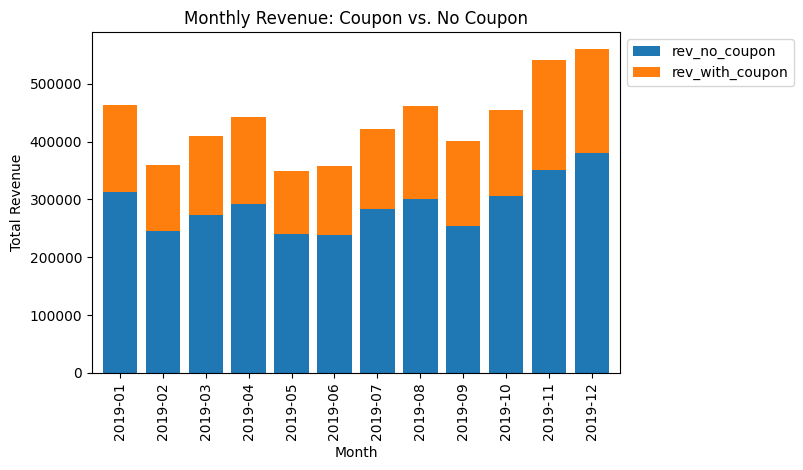

In [62]:
# b) Monthly stacked bar of coupon vs no‐coupon revenue
monthly_data.set_index("transaction_month")[["rev_no_coupon","rev_with_coupon"]].plot(
    kind="bar", stacked=True, width=0.8
)
plt.title("Monthly Revenue: Coupon vs. No Coupon")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.legend(["No Coupon","Coupon"])
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1000x400 with 0 Axes>

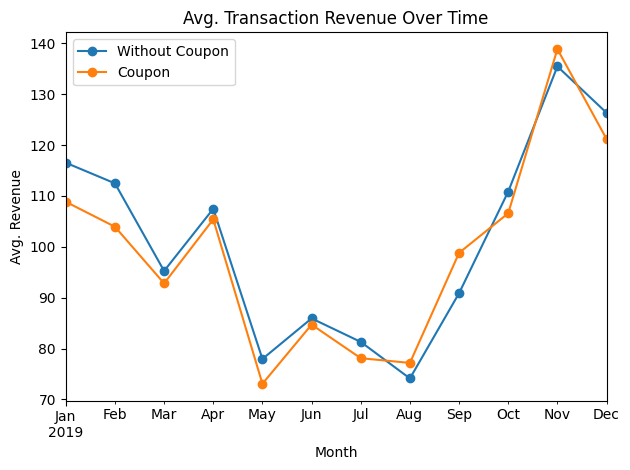

In [63]:
# c) Line plot of average revenue per transaction by coupon status over time
avg_monthly_revenue = (
    df_coupons_revenue_data
    .groupby(["transaction_month", "coupon_status"])["total_revenue"]
    .mean()
    .unstack()
    .rename(columns={0: "avg_without_coupon", 1: "avg_with_coupon"})
)
avg_monthly_revenue.index = avg_monthly_revenue.index.to_timestamp()
plt.figure(figsize=(10,4))
avg_monthly_revenue.plot(marker="o")
plt.title("Avg. Transaction Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Avg. Revenue")
plt.legend(["Without Coupon","Coupon"])
plt.tight_layout()
plt.show()

## Q7
Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?

In [64]:
top_products = df_merged.groupby('product_sku')['total_revenue'].sum().sort_values(ascending=False).head(10) # revenue per product
print("The top products by revenue are: ")
display(top_products)

The top products by revenue are: 


,total_revenue
product_sku,
ggoenebj079499,713873.03
ggoenebq078999,654298.21
ggoenebb078899,551596.34
ggoenebq079099,223078.94
ggoenebq079199,219973.10
ggoenebq084699,212370.22
ggoenebq092299,182867.18
ggoenebq086499,158634.21
ggoenebq086799,114530.70


,avg_price,avg_discount,avg_tenure,gender_distribution,location_distribution
product_sku,,,,,
ggoenebb078899,120.214594,19.715170,26.176780,"[0.6188854489164086, 0.3811145510835913]","[0.33374613003095976, 0.2953560371517028, 0.21..."
ggoenebd084799,149.556947,21.272265,26.814249,"[0.6564885496183206, 0.3435114503816794]","[0.356234096692112, 0.30025445292620867, 0.193..."
ggoenebj079499,150.981874,19.663913,25.917118,"[0.6083736827114782, 0.39162631728852176]","[0.35260609512959273, 0.3030475647963543, 0.20..."
ggoenebq078999,121.806541,19.900841,26.227464,"[0.6168870192307693, 0.3831129807692308]","[0.33774038461538464, 0.3019831730769231, 0.22..."
ggoenebq079099,79.838692,19.493020,25.690669,"[0.5980896399706098, 0.4019103600293902]","[0.3526818515797208, 0.29831006612784716, 0.20..."
ggoenebq079199,79.748254,19.755869,26.095775,"[0.6253521126760564, 0.37464788732394366]","[0.3596244131455399, 0.28544600938967135, 0.21..."
ggoenebq084699,149.644555,20.945822,25.629017,"[0.6409550045913682, 0.3590449954086318]","[0.36639118457300274, 0.29476584022038566, 0.1..."
ggoenebq086499,199.916728,22.237062,26.719533,"[0.5976627712854758, 0.4023372287145242]","[0.32220367278797996, 0.31719532554257096, 0.2..."
ggoenebq086799,99.674384,22.274882,26.642180,"[0.6161137440758294, 0.38388625592417064]","[0.3459715639810427, 0.3341232227488152, 0.186..."


,avg_price,avg_discount
avg_price,1.00000,0.72478
avg_discount,0.72478,1.00000


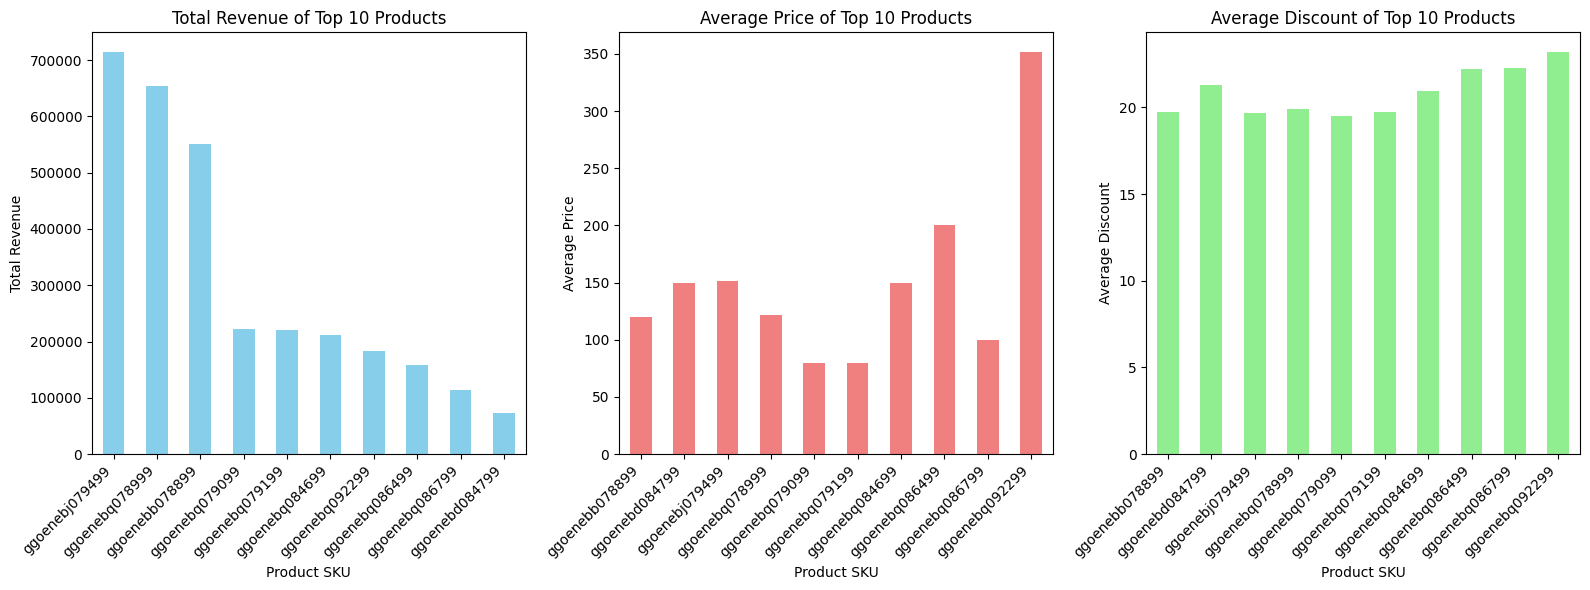

In [65]:
# Analyze attributes for top 10 products
top_10_products = top_products.index.tolist()
product_attributes = df_merged[df_merged['product_sku'].isin(top_10_products)].groupby('product_sku').agg(
    avg_price=('avg_price', 'mean'),
    avg_discount=('discount_pct', 'mean'),
    avg_tenure=('tenure_months', 'mean'),
    gender_distribution=('gender', lambda x: x.value_counts(normalize=True)),
    location_distribution=('location', lambda x: x.value_counts(normalize=True))
)

display(product_attributes)

#Relation between average discount and average price
correlation_discount_price = product_attributes[['avg_price', 'avg_discount']].corr()
display(correlation_discount_price)

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
top_products.plot(kind='bar', color='skyblue')
plt.title('Total Revenue of Top 10 Products')
plt.xlabel('Product SKU')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
product_attributes['avg_price'].plot(kind='bar', color='lightcoral')
plt.title('Average Price of Top 10 Products')
plt.xlabel('Product SKU')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
product_attributes['avg_discount'].plot(kind='bar', color='lightgreen')
plt.title('Average Discount of Top 10 Products')
plt.xlabel('Product SKU')
plt.ylabel('Average Discount')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Q8
Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?

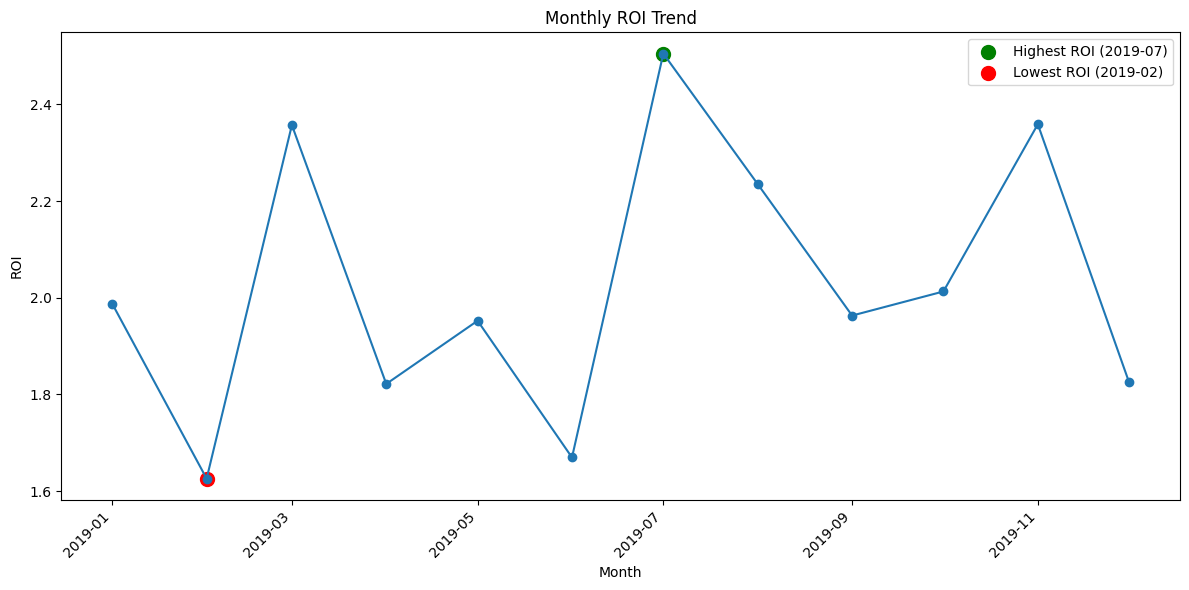

Month with highest ROI: 2019-07
Month with lowest ROI: 2019-02


In [66]:
monthly_revenue = df_merged.groupby(df_merged['transaction_date'].dt.to_period('M'))['total_revenue'].sum()

monthly_spend = df_marketing.groupby(df_marketing['date'].dt.to_period('M'))[['offline_spend', 'online_spend']].sum()
monthly_spend['total_marketing_spend'] = monthly_spend['offline_spend'] + monthly_spend['online_spend']

monthly_data = pd.merge(monthly_revenue, monthly_spend, left_index=True, right_index=True, how='left')

monthly_data['roi'] = (monthly_data['total_revenue'] - monthly_data['total_marketing_spend']) / monthly_data['total_marketing_spend']

highest_roi_month = monthly_data['roi'].idxmax()
lowest_roi_month = monthly_data['roi'].idxmin()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index.to_timestamp(), monthly_data['roi'], marker='o', linestyle='-')
plt.title('Monthly ROI Trend')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')

plt.scatter(highest_roi_month.to_timestamp(), monthly_data.loc[highest_roi_month, 'roi'], color='green', s=100, label=f'Highest ROI ({highest_roi_month})')
plt.scatter(lowest_roi_month.to_timestamp(), monthly_data.loc[lowest_roi_month, 'roi'], color='red', s=100, label=f'Lowest ROI ({lowest_roi_month})')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Month with highest ROI: {highest_roi_month}")
print(f"Month with lowest ROI: {lowest_roi_month}")

## Q9
Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results

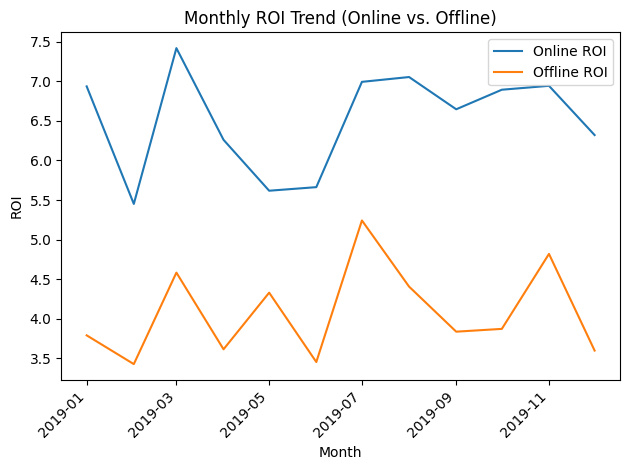

In [67]:
monthly_data['online_roi'] = (monthly_data['total_revenue'] - monthly_data['online_spend']) / monthly_data['online_spend']
monthly_data['offline_roi'] = (monthly_data['total_revenue'] - monthly_data['offline_spend']) / monthly_data['offline_spend']

plt.plot(monthly_data.index.to_timestamp(), monthly_data['online_roi'], label='Online ROI')
plt.plot(monthly_data.index.to_timestamp(), monthly_data['offline_roi'], label='Offline ROI')
plt.title('Monthly ROI Trend (Online vs. Offline)')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Q10
Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue?

In [68]:
def rfm_segment(df):
    if df['recency'] <= quantiles.loc[0.25, 'recency'] and df['frequency'] >= quantiles.loc[0.75, 'frequency'] and df['monetary_value'] >= quantiles.loc[0.75, 'monetary_value']:
        return 'Premium'
    elif df['recency'] <= quantiles.loc[0.5, 'recency'] and df['frequency'] >= quantiles.loc[0.5, 'frequency'] and df['monetary_value'] >= quantiles.loc[0.5, 'monetary_value']:
        return 'Gold'
    elif df['recency'] <= quantiles.loc[0.75, 'recency'] and df['frequency'] >= quantiles.loc[0.25, 'frequency'] and df['monetary_value'] >= quantiles.loc[0.25, 'monetary_value']:
        return 'Silver'
    else:
        return 'Standard'

In [69]:
quantiles = df_rfm[['recency', 'frequency', 'monetary_value']].quantile([0.25, 0.5, 0.75])

df_rfm['segment'] = df_rfm.apply(rfm_segment, axis=1)
display(df_rfm)

segment_analysis = df_rfm.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'mean'
})

display(segment_analysis)

,customerid,last_transaction_date,recency,frequency,monetary_value,cltv,segment
0,12346,2019-09-15,107,2,180.99,180.99,Standard
1,12347,2019-11-02,59,60,14500.04,14500.04,Gold
2,12348,2019-10-19,73,23,1639.27,1639.27,Silver
3,12350,2019-12-14,17,17,1487.95,1487.95,Silver
4,12356,2019-09-15,107,36,2079.96,2079.96,Gold
...,...,...,...,...,...,...,...
1463,18259,2019-04-05,270,7,822.67,822.67,Standard
1464,18260,2019-10-05,87,40,2995.47,2995.47,Gold
1465,18269,2019-06-20,194,8,153.06,153.06,Standard
1466,18277,2019-10-23,69,1,304.00,304.00,Standard


,recency,frequency,monetary_value
segment,,,
Gold,68.142857,55.282313,5599.707755
Premium,26.666667,114.508333,12701.530250
Silver,125.338422,30.837150,2650.163919
Standard,210.785174,16.355522,1536.183903


In [70]:
## Analysis of product categories, total_revenue, the discount percentage fro different segments segment
df_merged = pd.merge(df_merged, df_rfm[['customerid', 'segment']], on='customerid', how='left')

segment_product_preferences = df_merged.groupby(['segment', 'product_category'])['transaction_id'].count().reset_index()
display(segment_product_preferences)

segment_avg_order_value = df_merged.groupby('segment')['total_revenue'].mean().reset_index()
display(segment_avg_order_value)

segment_discount_usage = df_merged.groupby('segment')['discount_pct'].mean().reset_index()
display(segment_discount_usage)

,segment,product_category,transaction_id
0,Gold,accessories,91
1,Gold,android,10
2,Gold,apparel,5380
3,Gold,backpacks,29
4,Gold,bags,568
...,...,...,...
75,Standard,nest-canada,64
76,Standard,nest-usa,2959
77,Standard,notebooks & journals,172
78,Standard,office,1584


,segment,total_revenue
0,Gold,101.292935
1,Premium,110.922322
2,Silver,85.940624
3,Standard,93.924481


,segment,discount_pct
0,Gold,20.328051
1,Premium,21.222369
2,Silver,19.679700
3,Standard,18.071308


## Q11
Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?

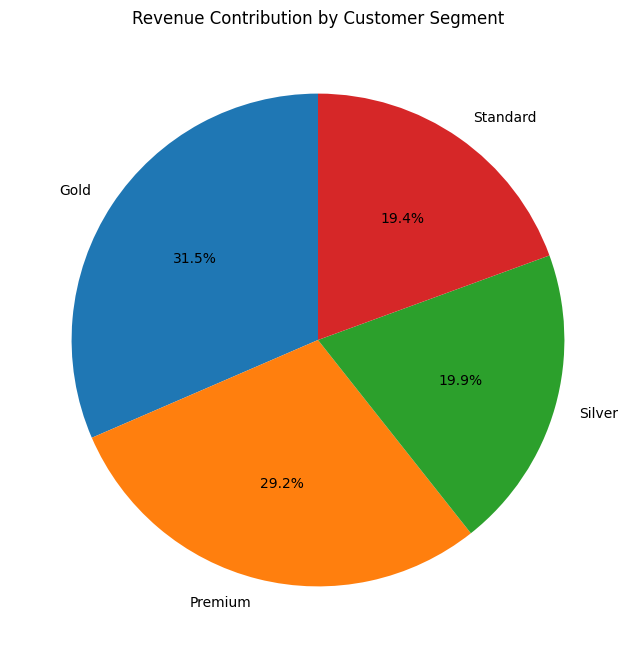

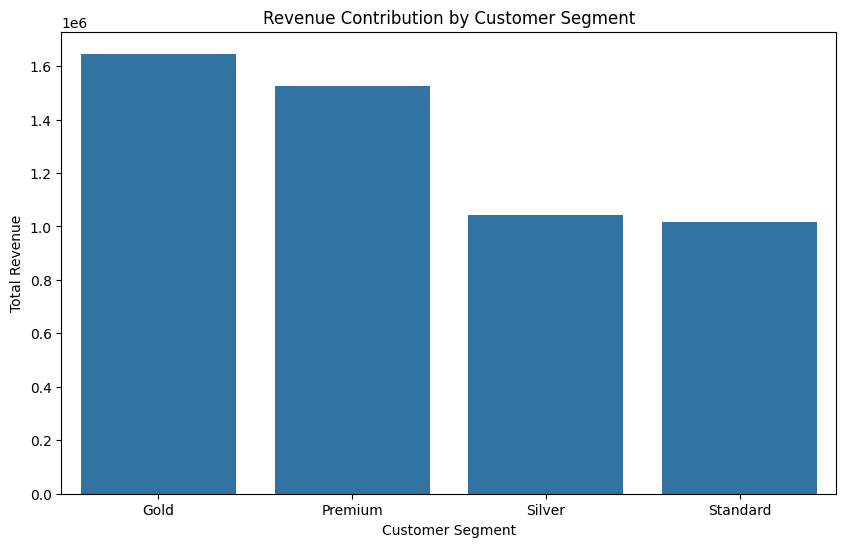

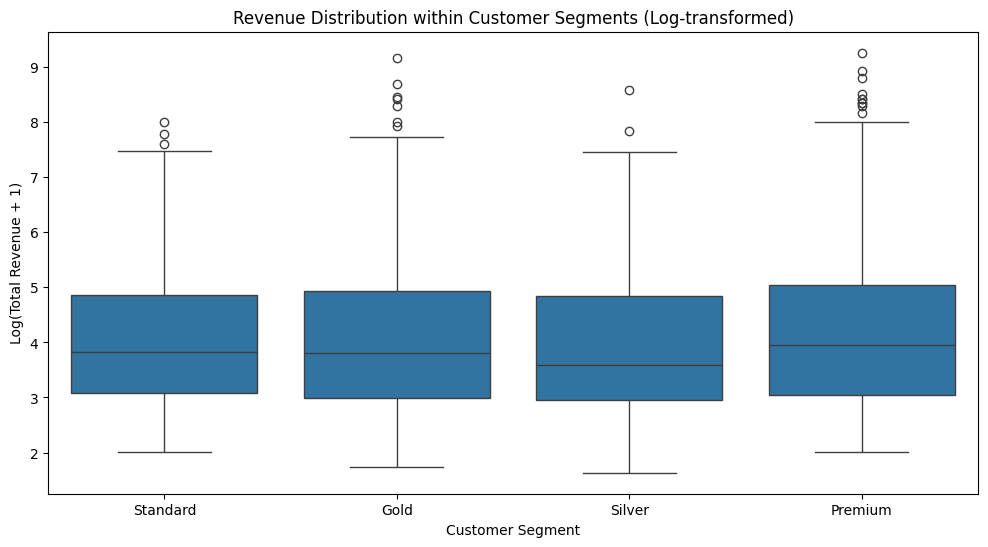

In [71]:
segment_revenue = df_merged.groupby('segment')['total_revenue'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(segment_revenue['total_revenue'], labels=segment_revenue['segment'], autopct='%1.1f%%', startangle=90)
plt.title('Revenue Contribution by Customer Segment')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='total_revenue', data=segment_revenue)
plt.title('Revenue Contribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.show()

copy = df_merged.copy()
copy['log_total_revenue'] = np.log1p(copy['total_revenue'])  # Logarithmic transformation
plt.figure(figsize=(12, 6))
sns.boxplot(x='segment', y='log_total_revenue', data=copy)
plt.title('Revenue Distribution within Customer Segments (Log-transformed)')
plt.xlabel('Customer Segment')
plt.ylabel('Log(Total Revenue + 1)')
plt.show()

## Q12
Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?

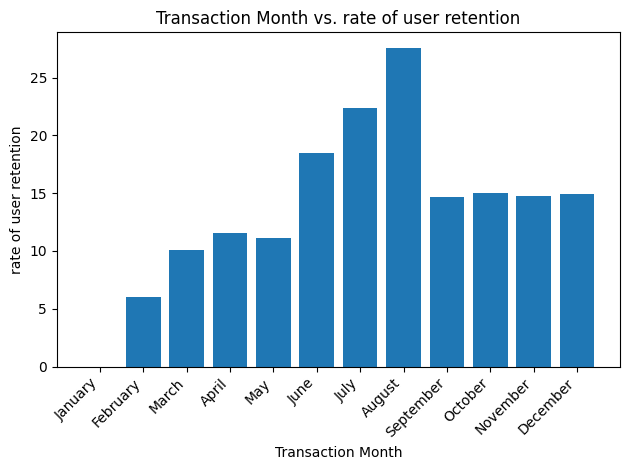

In [72]:
#Q12 is asking essentially the same thing as Q3
plt.bar(spending_acquisition_df['transaction_month'], spending_acquisition_df['retention_rate'])

plt.xlabel('Transaction Month')
plt.ylabel('rate of user retention')
plt.title('Transaction Month vs. rate of user retention')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

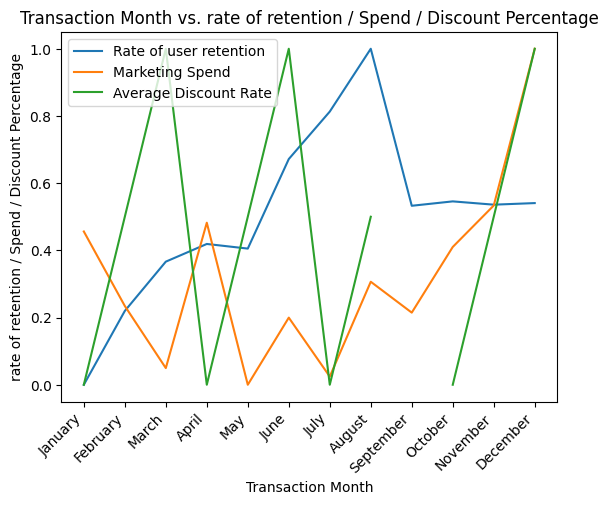

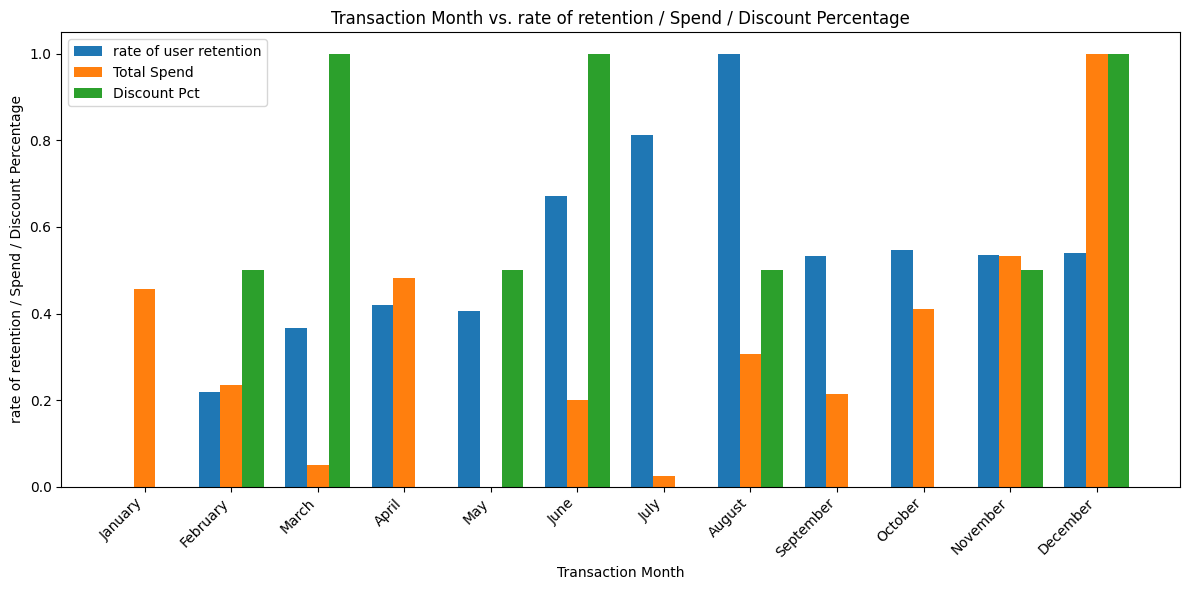

In [73]:
normalised_retention_data = spending_acquisition_df.copy()
scaler = MinMaxScaler()
colsToNormalize = ['retention_rate', 'total_spend', 'discount_pct']
normalised_retention_data[colsToNormalize] = scaler.fit_transform(normalised_retention_data[colsToNormalize])

plt.plot(normalised_retention_data['transaction_month'], normalised_retention_data['retention_rate'], label = 'Rate of user retention')
plt.plot(normalised_retention_data['transaction_month'], normalised_retention_data['total_spend'], label='Marketing Spend')
plt.plot(normalised_retention_data['transaction_month'], normalised_retention_data['discount_pct'], label='Average Discount Rate')

plt.xlabel('Transaction Month')
plt.ylabel('rate of retention / Spend / Discount Percentage')
plt.title('Transaction Month vs. rate of retention / Spend / Discount Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend()

bar_width = 0.25
x_pos = np.arange(len(normalised_retention_data['transaction_month']))

plt.figure(figsize=(12, 6))
plt.bar(x_pos, normalised_retention_data['retention_rate'], width=bar_width, label='rate of user retention')
plt.bar(x_pos + bar_width, normalised_retention_data['total_spend'], width=bar_width, label='Total Spend')
plt.bar(x_pos + 2 * bar_width, normalised_retention_data['discount_pct'], width=bar_width, label='Discount Pct')

plt.xticks(x_pos + bar_width, normalised_retention_data['transaction_month'])

plt.xlabel('Transaction Month')
plt.ylabel('rate of retention / Spend / Discount Percentage')
plt.title('Transaction Month vs. rate of retention / Spend / Discount Percentage')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Q13
Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?

In [ ]:
## Customer lifetime value has already been calculated above, so we can use the same here

In [ ]:
df_merged.columns

Index(['customerid', 'transaction_id', 'transaction_date', 'product_sku',
       'product_description', 'product_category', 'quantity', 'avg_price',
       'delivery_charges', 'coupon_status', 'month', 'coupon_code',
       'discount_pct', 'gender', 'location', 'tenure_months',
       'transaction_month', 'online_spend', 'offline_spend', 'total_spend',
       'gst', 'last_transaction_date', 'recency', 'frequency',
       'monetary_value', 'cltv', 'total_revenue', 'segment'],
      dtype='object')

,acquisition_month,cltv
0,2019-01,1171623.97
1,2019-02,615322.12
2,2019-03,754046.98
3,2019-04,498332.19
4,2019-05,373681.97
5,2019-06,326935.10
6,2019-07,264720.40
7,2019-08,292840.85
8,2019-09,170095.81
9,2019-10,257686.99


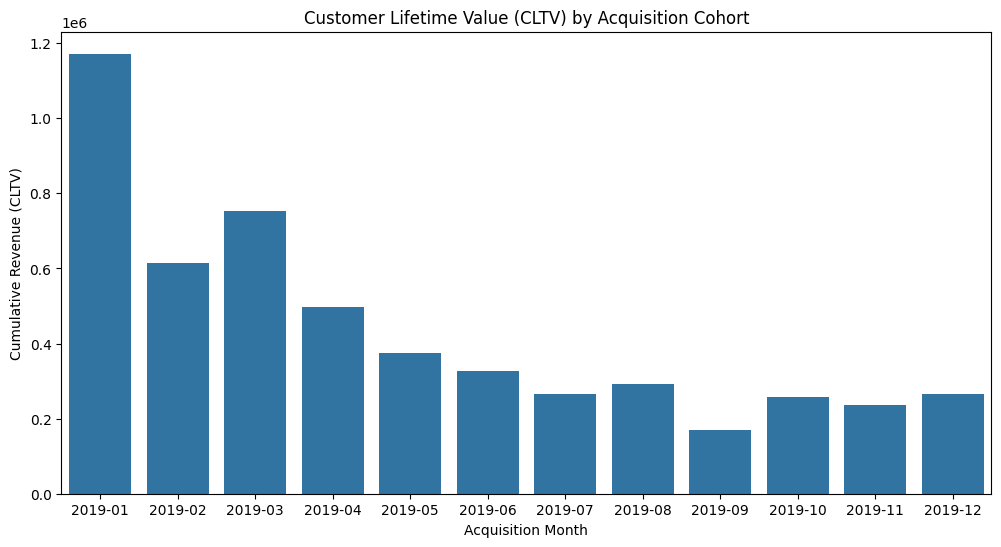

In [ ]:
df_merged['acquisition_month'] = df_merged.groupby('customerid')['transaction_date'].transform('min').dt.to_period('M')

cohort_cltv = df_merged.groupby(['acquisition_month'])['total_revenue'].sum().reset_index()
cohort_cltv.rename(columns={'total_revenue': 'cltv'}, inplace=True)
display(cohort_cltv)

plt.figure(figsize=(12, 6))
sns.barplot(x='acquisition_month', y='cltv', data=cohort_cltv)
plt.title('Customer Lifetime Value (CLTV) by Acquisition Cohort')
plt.xlabel('Acquisition Month')
plt.ylabel('Cumulative Revenue (CLTV)')

plt.show()

## 14
Do customers who use coupons have a different average transaction value compared to those who do not?
Conduct a statistical test to validate this hypothesis. What implications does this have for the company’s discount and coupon strategies?

In [ ]:
coupon_users = df_merged[df_merged['coupon_status'] == 'used']
non_coupon_users = df_merged[df_merged['coupon_status'] != 'used']

# Null Hypothesis: There is no difference in average transaction value between coupon users and non-coupon users.
# Alternative Hypothesis: There is a difference in average transaction value between coupon users and non-coupon users.

t_statistic, p_value = stats.ttest_ind(coupon_users['total_revenue'], non_coupon_users['total_revenue'])

print("T-statistic value is: ", t_statistic)
print("P-value is: ", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a statistically significant difference in average transaction value between coupon users and non-coupon users.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no statistically significant difference in average transaction value between coupon users and non-coupon users.")

T-statistic value is:  -1.1105028921794422
P-value is:  0.2667874279989738
Fail to reject the null hypothesis.
There is no statistically significant difference in average transaction value between coupon users and non-coupon users.


In [ ]:
coupon_users.columns

Index(['customerid', 'transaction_id', 'transaction_date', 'product_sku',
       'product_description', 'product_category', 'quantity', 'avg_price',
       'delivery_charges', 'coupon_status', 'month', 'coupon_code',
       'discount_pct', 'gender', 'location', 'tenure_months',
       'transaction_month', 'online_spend', 'offline_spend', 'total_spend',
       'gst', 'last_transaction_date', 'recency', 'frequency',
       'monetary_value', 'cltv', 'total_revenue', 'segment',
       'acquisition_month'],
      dtype='object')

In [ ]:
coupon_users['month']

,month
0,1
1,1
2,1
4,1
5,1
...,...
52907,12
52911,12
52912,12
52920,12


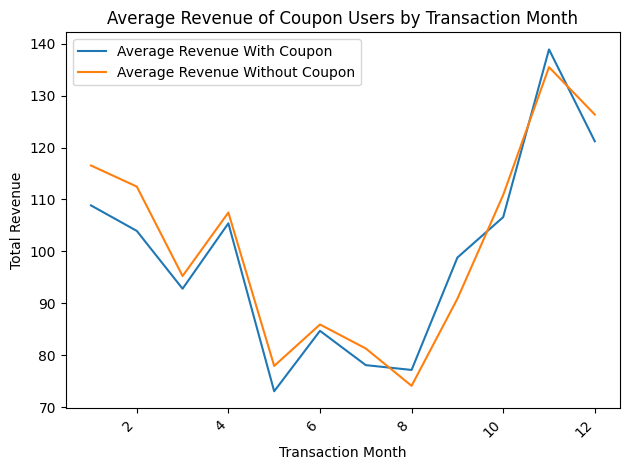

In [ ]:
coupon_users_average_revenue = coupon_users.groupby('transaction_month')['total_revenue'].mean().reset_index()
non_coupon_users_average_revenue = non_coupon_users.groupby('transaction_month')['total_revenue'].mean().reset_index()

plt.plot(coupon_users_average_revenue['transaction_month'].dt.month, coupon_users_average_revenue['total_revenue'], label = 'Average Revenue With Coupon')
plt.plot(non_coupon_users_average_revenue['transaction_month'].dt.month, non_coupon_users_average_revenue['total_revenue'], label = 'Average Revenue Without Coupon')
plt.xlabel('Transaction Month')
plt.ylabel('Total Revenue')
plt.title('Average Revenue of Coupon Users by Transaction Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## 15
Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)?
Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?

In [ ]:
## We will check for differences in purchase behavior across locations, age groups, or delivery charge tiers.

In [ ]:
location_groups = df_merged.groupby('location')

fvalue, pvalue = stats.f_oneway(*[group['total_revenue'] for name, group in location_groups])
print(f"ANOVA for order value across locations: F-value = {fvalue}, p-value = {pvalue}")

ANOVA for order value across locations: F-value = 2.8361212203128505, p-value = 0.02296323645910237


In [ ]:
fvalue, pvalue = stats.f_oneway(*[group['frequency'] for name, group in location_groups])
print(f"ANOVA for frequency across locations: F-value = {fvalue}, p-value = {pvalue}")

ANOVA for frequency across locations: F-value = 566.0589430758187, p-value = 0.0


## 16
Does customer tenure impact purchase frequency?
Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?

In [ ]:
freq = (
    df_merged.groupby("customerid")
      .agg(
          total_tx=("transaction_id", "nunique"),
          tenure_months=("tenure_months", "first")
      )
      .reset_index()
)
freq["tx_per_month"] = freq["total_tx"] / freq["tenure_months"].clip(lower=1)
print("The Correlation between the two is: ", freq['tx_per_month'].corr(freq['tenure_months']))

The Correlation between the two is:  -0.40274277057546637



Average Transactions per Month by Tenure Bin:
tenure_bin  avg_tx_per_month
       0–6          4.388017
      7–12          1.960450
     13–24          0.930716
       25+          0.539570


<ipython-input-80-f56430ceec53>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq.groupby("tenure_bin")["tx_per_month"]


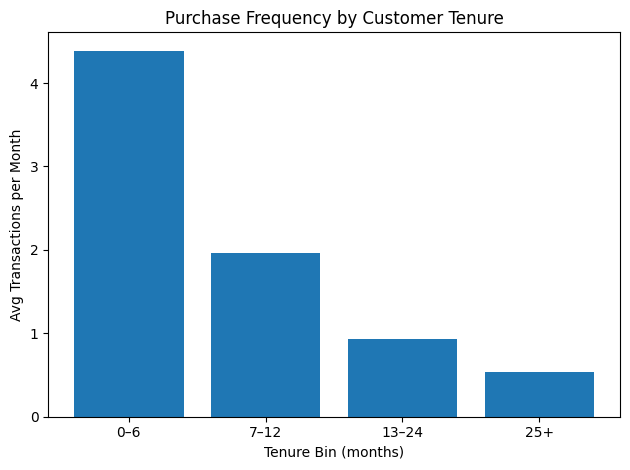

In [ ]:
bins = [0, 6, 12, 24, freq["tenure_months"].max()]
labels = ["0–6", "7–12", "13–24", "25+"]
freq["tenure_bin"] = pd.cut(freq["tenure_months"], bins=bins, labels=labels, right=True, include_lowest=True)

bin_summary = (
    freq.groupby("tenure_bin")["tx_per_month"]
        .mean()
        .reset_index()
        .rename(columns={"tx_per_month": "avg_tx_per_month"})
)
print("\nAverage Transactions per Month by Tenure Bin:")
print(bin_summary.to_string(index=False))

plt.figure()
plt.bar(bin_summary["tenure_bin"].astype(str), bin_summary["avg_tx_per_month"])
plt.xlabel("Tenure Bin (months)")
plt.ylabel("Avg Transactions per Month")
plt.title("Purchase Frequency by Customer Tenure")
plt.tight_layout()
plt.show()

## 17
Analyze the relationship between delivery charges and order behavior. Are there opportunities to optimize delivery pricing to increase order quantities or revenue?

<ipython-input-81-930372cb5ac0>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df_merged_copy.groupby("Delivery_Bin").agg(


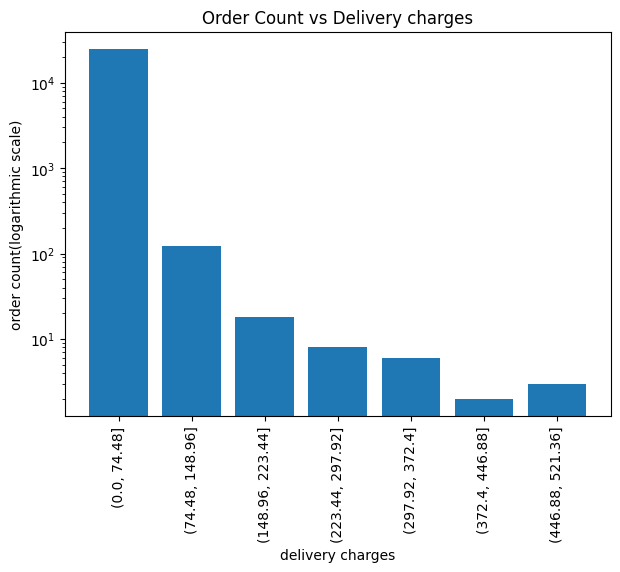

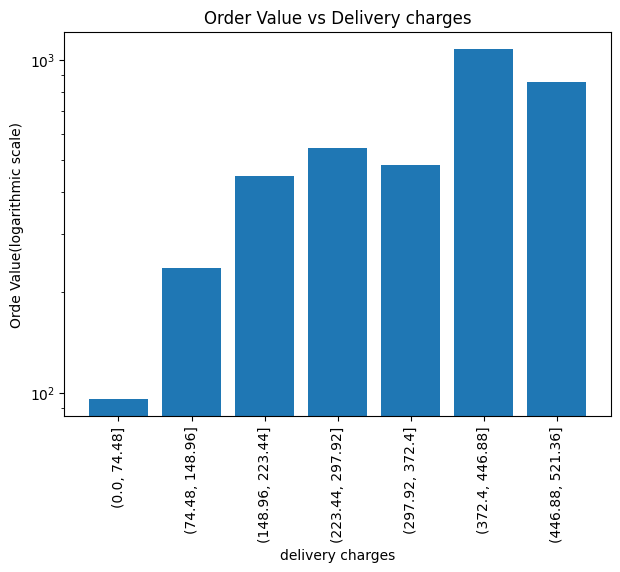

In [ ]:
df_merged_copy = df_merged.copy()
df_merged_copy['Delivery_Bin'] = pd.cut(df_merged_copy["delivery_charges"], bins=np.linspace(0, df_merged_copy["delivery_charges"].max(), 8))
agg = df_merged_copy.groupby("Delivery_Bin").agg(
    avg_quantity=("quantity", "mean"),
    avg_tx_value=("total_revenue", "mean"),
    order_count=("transaction_id", "nunique")
).reset_index()

plt.figure()
plt.bar(agg["Delivery_Bin"].astype(str), agg["order_count"])
plt.yscale("log")
plt.xlabel("delivery charges")
plt.ylabel("order count(logarithmic scale)") # log scale used here since y values were too large in magnitude for one bin as compared to others
plt.title("Order Count vs Delivery charges")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

plt.figure()
plt.bar(agg["Delivery_Bin"].astype(str), agg["avg_tx_value"])
plt.yscale("log")
plt.xlabel("delivery charges")
plt.ylabel("Orde Value(logarithmic scale)") # used here since y values were too large in magnitude for one bin as compared to others
plt.title("Order Value vs Delivery charges")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## 18
Evaluate how taxes and delivery charges influence customer spending behavior. Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?

In [ ]:
## taxes and delivery charges vs the order amount or the revenue

In [ ]:
df_sales_tax = df_merged.copy()
df_sales_tax["pre_tax_amount"] = df_sales_tax["quantity"] * df_sales_tax["avg_price"]
df_sales_tax["tax_amount"]   = df_sales_tax["pre_tax_amount"] * df_sales_tax["gst"] / 100
df_sales_tax["total_spend"]  = df_sales_tax["pre_tax_amount"] + df_sales_tax["tax_amount"] + df_sales_tax["delivery_charges"]
df_sales_tax

,customerid,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,...,last_transaction_date,recency,frequency,monetary_value,cltv,total_revenue,segment,acquisition_month,pre_tax_amount,tax_amount
0,17850,16679,2019-01-01,ggoenebj079499,nest learning thermostat 3rd gen-usa - stainle...,nest-usa,1,153.71,6.50,used,...,2019-01-26,339,297,37714.02,37714.02,160.21,Standard,2019-01,153.71,0.153710
1,17850,16680,2019-01-01,ggoenebj079499,nest learning thermostat 3rd gen-usa - stainle...,nest-usa,1,153.71,6.50,used,...,2019-01-26,339,297,37714.02,37714.02,160.21,Standard,2019-01,153.71,0.153710
2,17850,16681,2019-01-01,ggoegfkq020399,google laptop and cell phone stickers,office,1,2.05,6.50,used,...,2019-01-26,339,297,37714.02,37714.02,8.55,Standard,2019-01,2.05,0.002050
3,17850,16682,2019-01-01,ggoegaab010516,google men's 100% cotton short sleeve hero tee...,apparel,5,17.53,6.50,not used,...,2019-01-26,339,297,37714.02,37714.02,94.15,Standard,2019-01,87.65,0.157770
4,17850,16682,2019-01-01,ggoegbjl013999,google canvas tote natural/navy,bags,1,16.50,6.50,used,...,2019-01-26,339,297,37714.02,37714.02,23.00,Standard,2019-01,16.50,0.029700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,ggoenebb078899,nest cam indoor security camera - usa,nest-usa,1,121.30,6.50,clicked,...,2019-12-31,0,8,1160.99,1160.99,127.80,Standard,2019-12,121.30,0.121300
52920,14410,48494,2019-12-31,ggoegaeb091117,google zip hoodie black,apparel,1,48.92,6.50,used,...,2019-12-31,0,8,1160.99,1160.99,55.42,Standard,2019-12,48.92,0.088056
52921,14410,48495,2019-12-31,ggoenebq084699,nest learning thermostat 3rd gen-usa - white,nest-usa,1,151.88,6.50,used,...,2019-12-31,0,8,1160.99,1160.99,158.38,Standard,2019-12,151.88,0.151880
52922,14600,48496,2019-12-31,ggoenebq079199,nest protect smoke + co white wired alarm-usa,nest-usa,5,80.52,6.50,clicked,...,2019-12-31,0,2,751.17,751.17,409.10,Standard,2019-12,402.60,0.402600


In [ ]:
# Correlation analysis
r_gst, p_gst = pearsonr(df_sales_tax["gst"], df_sales_tax["total_spend"])
r_delivery, p_delivery = pearsonr(df_sales_tax["delivery_charges"], df_sales_tax["total_spend"])
print(f"Correlation GST% ↔ Total Spend: r = {r_gst:.3f}, p = {p_gst:.3g}")
print(f"Correlation Delivery Charges ↔ Total Spend: r = {r_delivery:.3f}, p = {p_delivery:.3g}")

Correlation GST% ↔ Total Spend: r = -0.312, p = 0
Correlation Delivery Charges ↔ Total Spend: r = 0.183, p = 0


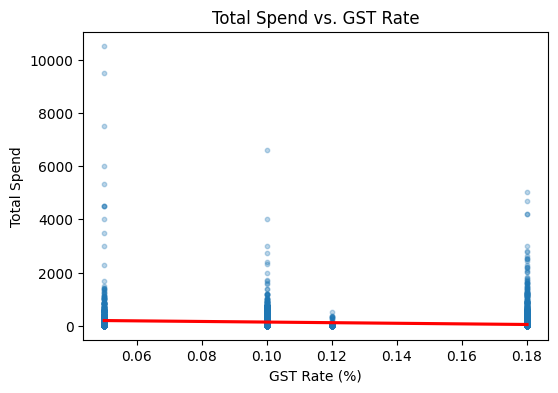

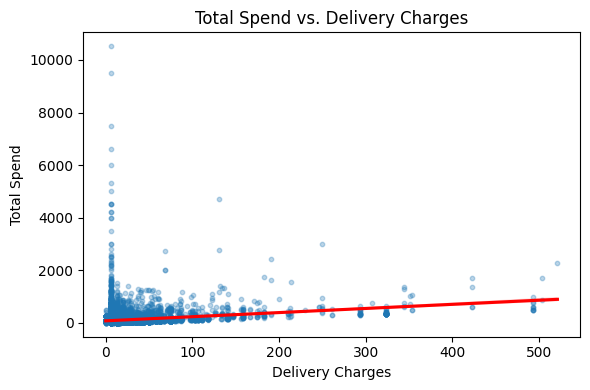

In [ ]:
# GST Vs Total Spend
plt.figure(figsize=(6,4))
sns.regplot(
    x="gst",
    y="total_spend",
    data=df_sales_tax,
    scatter_kws={"alpha":0.3, "s":10},
    line_kws={"color":"red"}
)
plt.title("Total Spend vs. GST Rate")
plt.xlabel("GST Rate (%)")
plt.ylabel("Total Spend")
# plt.tight_layout()
# plt.show()

# delivery charges vs total spend
plt.figure(figsize=(6,4))
sns.regplot(
    x="delivery_charges",
    y="total_spend",
    data=df_sales_tax,
    scatter_kws={"alpha":0.3, "s":10},
    line_kws={"color":"red"}
)
plt.title("Total Spend vs. Delivery Charges")
plt.xlabel("Delivery Charges")
plt.ylabel("Total Spend")
plt.tight_layout()
plt.show()

In [ ]:
df_sales_tax['gst'] = df_sales_tax['gst']*100

<ipython-input-88-14bf6e06b92b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sales_tax.groupby("gst_bin")["total_spend"]


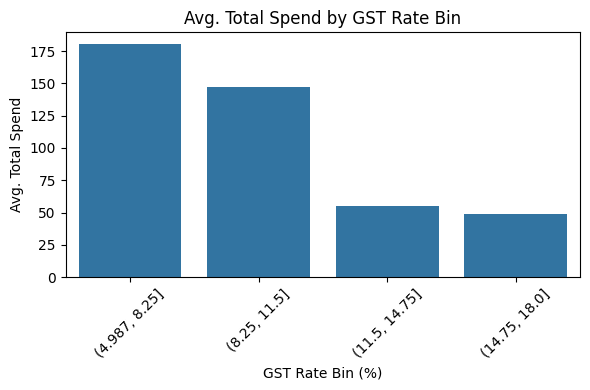

In [ ]:
df_sales_tax["gst_bin"] = pd.cut(df_sales_tax["gst"], 4)
gst_summary = (
    df_sales_tax.groupby("gst_bin")["total_spend"]
      .mean()
      .reset_index()
      .rename(columns={"total_spend":"avg_total_spend"})
)

plt.figure(figsize=(6,4))
sns.barplot(x="gst_bin", y="avg_total_spend", data=gst_summary)
plt.title("Avg. Total Spend by GST Rate Bin")
plt.xlabel("GST Rate Bin (%)")
plt.ylabel("Avg. Total Spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-91-d45fc0a22745>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sales_tax.groupby("delivery_bin")["total_spend"]


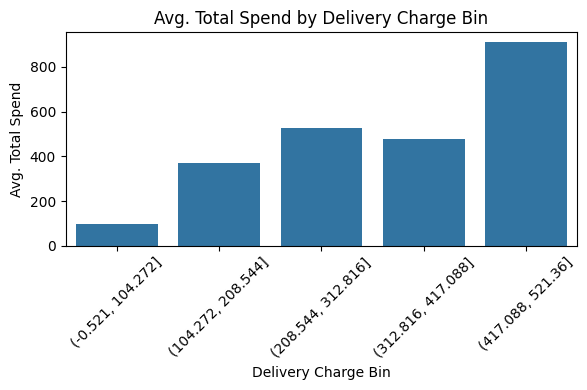

In [ ]:
df_sales_tax["delivery_bin"] = pd.cut(df_sales_tax["delivery_charges"], 5)
deliv_summary = (
    df_sales_tax.groupby("delivery_bin")["total_spend"]
      .mean()
      .reset_index()
      .rename(columns={"total_spend":"avg_total_spend"})
)

plt.figure(figsize=(6,4))
sns.barplot(x="delivery_bin", y="avg_total_spend", data=deliv_summary)
plt.title("Avg. Total Spend by Delivery Charge Bin")
plt.xlabel("Delivery Charge Bin")
plt.ylabel("Avg. Total Spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 19
Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?

<ipython-input-92-42c8382ff53d>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_by_category = df_merged.groupby(['transaction_month', 'product_category'])['total_revenue'].sum().reset_index()
<ipython-input-92-42c8382ff53d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales_by_location = df_merged.groupby(['transaction_month', 'location'])['total_revenue'].sum().reset_index()


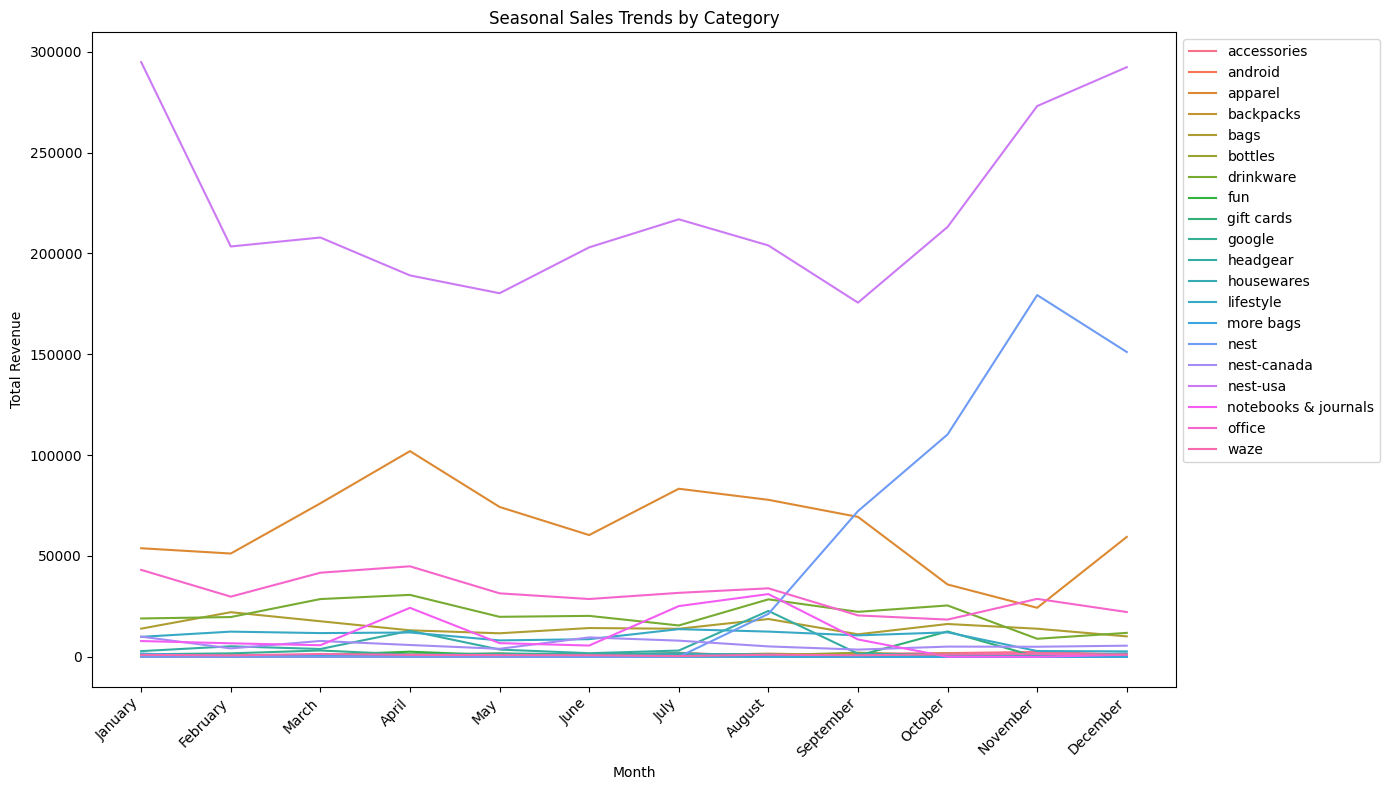

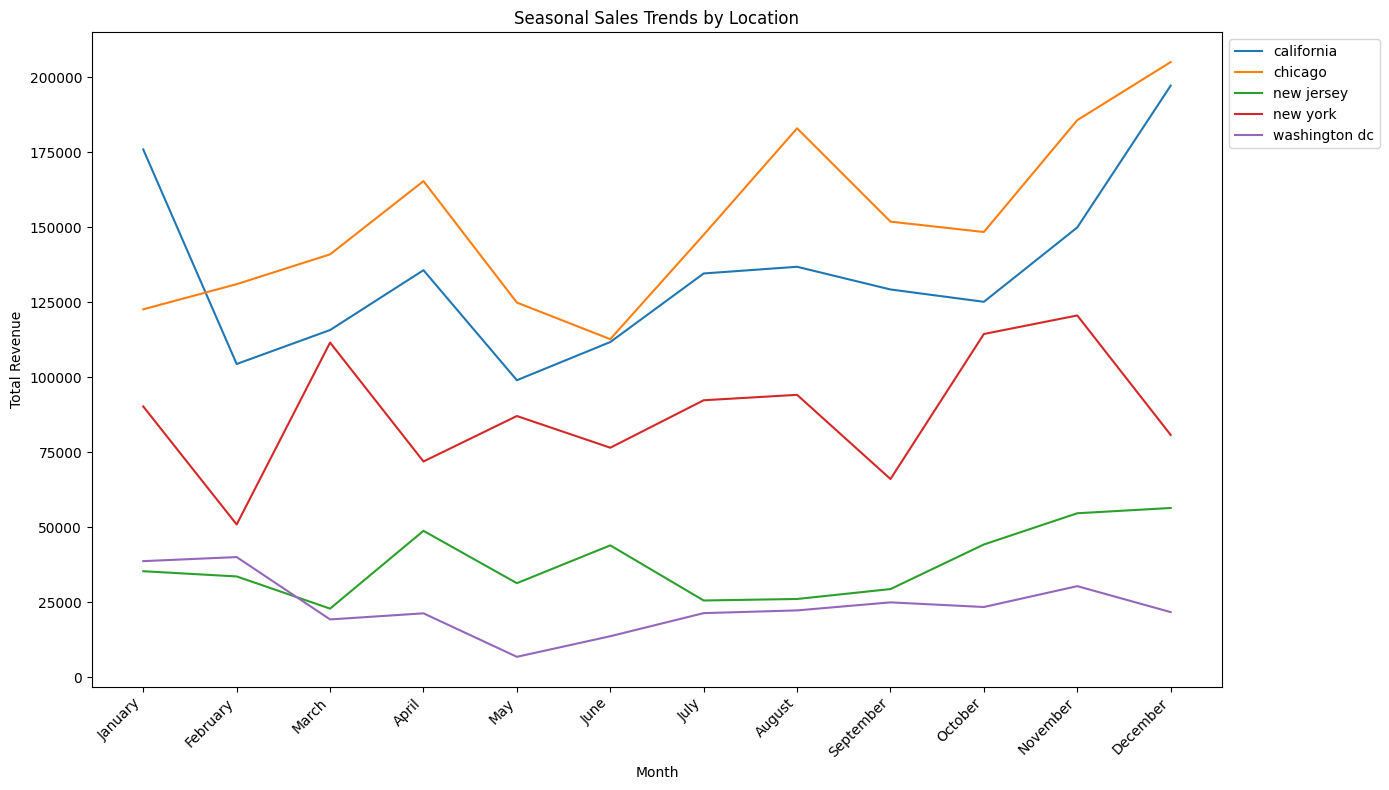

In [ ]:
df_merged['transaction_month'] = df_merged['transaction_date'].dt.month.apply(lambda x: calendar.month_name[x])

df_merged['transaction_month'] = pd.Categorical(df_merged['transaction_month'], categories=calendar.month_name[1:], ordered=True)

monthly_sales_by_category = df_merged.groupby(['transaction_month', 'product_category'])['total_revenue'].sum().reset_index()

monthly_sales_by_location = df_merged.groupby(['transaction_month', 'location'])['total_revenue'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='transaction_month', y='total_revenue', hue='product_category', data=monthly_sales_by_category)
plt.title('Seasonal Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x='transaction_month', y='total_revenue', hue='location', data=monthly_sales_by_location)
plt.title('Seasonal Sales Trends by Location')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## 20
Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?

In [ ]:
df_daily_revenue = (
    df_merged
    .groupby('transaction_date')
    .agg(
        daily_revenue = ('total_revenue', 'sum'),
        daily_orders  = ('transaction_id', 'nunique')
    )
    .reset_index()
)
df_daily_revenue['weekday'] = df_daily_revenue['transaction_date'].dt.day_name()
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_weekly_revenue = (
    df_daily_revenue
    .groupby('weekday')
    .agg(
        avg_revenue = ('daily_revenue','mean'),
        avg_orders  = ('daily_orders','mean')
    )
    .reindex(weekday_order)
    .reset_index()
)

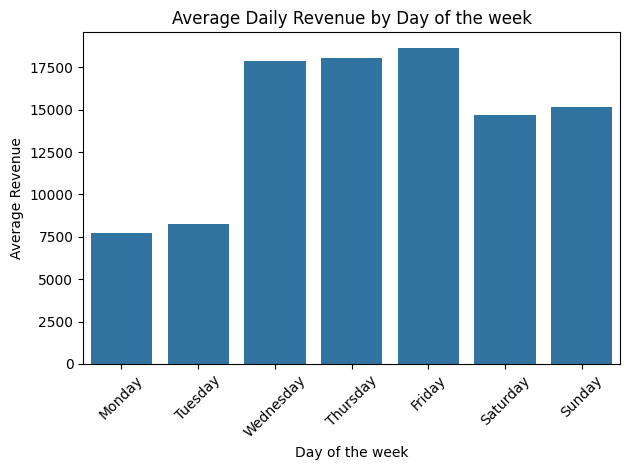

In [ ]:
sns.barplot(data=df_weekly_revenue, x='weekday', y='avg_revenue', order=weekday_order)
plt.title('Average Daily Revenue by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()